## Giới thiệu về đề tài

Tập dữ liệu này chứa thông tin về sức khỏe và lối sống, bao gồm các yếu tố như mức độ căng thẳng hàng ngày, lượng trái cây và rau xanh tiêu thụ, mạng lưới xã hội, số giờ ngủ và điểm số cân bằng công việc-cuộc sống. Chúng ta đã tải dữ liệu và lọc nó để tập trung vào các cá nhân thuộc nhóm tuổi 'Dưới 20' và '21 đến 35'. Dữ liệu này có thể được sử dụng để phân tích các khía cạnh khác nhau của sức khỏe, xác định các mô hình và hiểu mối quan hệ giữa các lựa chọn lối sống và tổng thể sức khỏe.

## Mục tiêu của đề tài

Mục tiêu chính của đề tài này là:

*   Phân tích các khía cạnh khác nhau của sức khỏe và lối sống trong tập dữ liệu.
*   Xác định các mô hình và xu hướng liên quan đến các yếu tố sức khỏe, đặc biệt tập trung vào nhóm tuổi 'Dưới 20' và '21 đến 35'.
*  Áp dụng mô hình học máy để tìm thuật toán tối ưu nhất cho dữ liệu.
*  Từ đó đưa ra các khuyến nghị thực tiễn dựa trên dữ liệu phân tích, đề xuất các thói quen sinh hoạt lành mạnh để giúp sinh viên tự điều chỉnh.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


### Mô tả các cột

Dưới đây là ý nghĩa của từng cột trong tập dữ liệu đã lọc (`df_student`) của chúng ta:

*   **Timestamp**: Ngày và giờ dữ liệu được ghi lại.
*   **FRUITS_VEGGIES**: Mức độ tiêu thụ trái cây và rau quả (có thể là thang điểm).
*   **DAILY_STRESS**: Mức độ căng thẳng hàng ngày (có thể là thang điểm).
*   **PLACES_VISITED**: Số lượng địa điểm đã ghé thăm.
*   **CORE_CIRCLE**: Số lượng người trong vòng kết nối cốt lõi của một người.
*   **SUPPORTING_OTHERS**: Mức độ hỗ trợ người khác (có thể là thang điểm).
*   **SOCIAL_NETWORK**: Mức độ tương tác với mạng xã hội (có thể là thang điểm).
*   **ACHIEVEMENT**: Mức độ thành tựu cá nhân (có thể là thang điểm).
*   **DONATION**: Mức độ đóng góp hoặc từ thiện (có thể là thang điểm).
*   **BMI_RANGE**: Phạm vi Chỉ số khối cơ thể (BMI) (có thể được phân loại).
*   **TODO_COMPLETED**: Số lượng nhiệm vụ đã hoàn thành.
*   **FLOW**: Mức độ trải nghiệm 'dòng chảy' (trạng thái hoàn toàn tập trung vào một hoạt động, có thể là thang điểm).
*   **DAILY_STEPS**: Số bước đi hàng ngày.
*   **LIVE_VISION**: Mức độ có tầm nhìn rõ ràng về cuộc sống (có thể là thang điểm).
*   **SLEEP_HOURS**: Số giờ ngủ mỗi ngày.
*   **LOST_VACATION**: Số ngày nghỉ phép đã mất.
*   **DAILY_SHOUTING**: Mức độ la hét hoặc thể hiện sự tức giận hàng ngày (có thể là thang điểm).
*   **SUFFICIENT_INCOME**: Cá nhân có thu nhập đủ hay không (có thể là thang nhị phân hoặc thang điểm).
*   **PERSONAL_AWARDS**: Số giải thưởng cá nhân nhận được.
*   **TIME_FOR_PASSION**: Lượng thời gian dành cho đam mê cá nhân (có thể là thang điểm).
*   **WEEKLY_MEDITATION**: Số lần thiền định hàng tuần.
*   **AGE**: Nhóm tuổi của cá nhân.
*   **GENDER**: Giới tính của cá nhân.
*   **WORK_LIFE_BALANCE_SCORE**: Điểm số được tính toán đại diện cho sự cân bằng giữa công việc và cuộc sống.

###Xử lý dữ liệu


In [ ]:
target_groups = ['Less than 20', '21 to 35']
df_student = df[df['AGE'].isin(target_groups)].copy()

print(f"Số lượng mẫu sau khi lọc tuổi: {len(df_student)}")
df_student

Số lượng mẫu sau khi lọc tuổi: 7927


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
7,7/9/15,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,676.2
8,7/9/15,5,3,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,702.8
11,7/12/15,1,4,3,8,0,2,1,0,1,...,7,7,1,2,4,1,7,21 to 35,Male,618.6
12,7/12/15,2,2,10,5,2,8,3,4,2,...,8,0,0,2,5,2,7,21 to 35,Male,686.4
14,7/12/15,3,3,2,3,7,5,3,2,1,...,8,3,2,1,4,5,4,21 to 35,Female,639.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15965,3/14/21 1:42,5,4,2,4,8,2,2,0,1,...,7,2,1,1,1,0,2,21 to 35,Female,620.1
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [ ]:
print("Các giá trị duy nhất trong cột 'AGE' trước khi chuyển đổi:")
print(df_student['AGE'].unique())

# Ánh xạ các nhóm tuổi sang dạng số
age_mapping = {'Less than 20': 0, '21 to 35': 1}
df_student['AGE'] = df_student['AGE'].map(age_mapping)

print("\nCác giá trị duy nhất trong cột 'AGE' sau khi chuyển đổi:")
print(df_student['AGE'].unique())

print("\nHiển thị 5 hàng đầu của df_student với cột 'AGE' đã được chuyển đổi:")
display(df_student.head())

Các giá trị duy nhất trong cột 'AGE' trước khi chuyển đổi:
['21 to 35' 'Less than 20']

Các giá trị duy nhất trong cột 'AGE' sau khi chuyển đổi:
[1 0]

Hiển thị 5 hàng đầu của df_student với cột 'AGE' đã được chuyển đổi:


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
7,7/9/15,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,1,Female,676.2
8,7/9/15,5,3,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,1,Female,702.8
11,7/12/15,1,4,3,8,0,2,1,0,1,...,7,7,1,2,4,1,7,1,Male,618.6
12,7/12/15,2,2,10,5,2,8,3,4,2,...,8,0,0,2,5,2,7,1,Male,686.4
14,7/12/15,3,3,2,3,7,5,3,2,1,...,8,3,2,1,4,5,4,1,Female,639.7


In [ ]:
df_student['DAILY_STRESS'] = pd.to_numeric(df_student['DAILY_STRESS'], errors='coerce')
# Impute missing values in 'DAILY_STRESS' with the mean
df_student['DAILY_STRESS'].fillna(df_student['DAILY_STRESS'].mean(), inplace=True)

/tmp/ipython-input-213717038.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_student['DAILY_STRESS'].fillna(df_student['DAILY_STRESS'].mean(), inplace=True)


In [ ]:
print("Các giá trị duy nhất trong cột 'GENDER' trước khi chuyển đổi:")
print(df_student['GENDER'].unique())

# Ánh xạ 'Female' sang 0 và 'Male' sang 1
gender_mapping = {'Female': 0, 'Male': 1}
df_student['GENDER'] = df_student['GENDER'].map(gender_mapping)

print("\nCác giá trị duy nhất trong cột 'GENDER' sau khi chuyển đổi:")
print(df_student['GENDER'].unique())

print("\nHiển thị 5 hàng đầu của df_student với cột 'GENDER' đã được chuyển đổi:")
display(df_student.head())

Các giá trị duy nhất trong cột 'GENDER' trước khi chuyển đổi:
['Female' 'Male']

Các giá trị duy nhất trong cột 'GENDER' sau khi chuyển đổi:
[0 1]

Hiển thị 5 hàng đầu của df_student với cột 'GENDER' đã được chuyển đổi:


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
7,7/9/15,3,4.0,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,1,0,676.2
8,7/9/15,5,3.0,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,1,0,702.8
11,7/12/15,1,4.0,3,8,0,2,1,0,1,...,7,7,1,2,4,1,7,1,1,618.6
12,7/12/15,2,2.0,10,5,2,8,3,4,2,...,8,0,0,2,5,2,7,1,1,686.4
14,7/12/15,3,3.0,2,3,7,5,3,2,1,...,8,3,2,1,4,5,4,1,0,639.7


In [ ]:
df_student.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
count,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,...,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000
mean,2.685253,2.801287,5.275388,5.455027,5.017661,6.444178,3.934401,2.311089,1.317649,5.504478,...,7.125142,3.049830,2.997351,1.658004,5.316135,3.323199,6.055759,0.770531,0.418948,661.770607
std,1.435628,1.356289,3.314148,2.817605,3.148433,3.059694,2.662245,1.796022,0.465591,2.628374,...,1.240043,3.653234,2.694490,0.474408,3.070452,2.675389,3.017096,0.420518,0.493418,43.822452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,3.500000,...,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,1.000000,0.000000,632.500000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,2.000000,1.000000,6.000000,...,7.000000,1.000000,2.000000,2.000000,5.000000,3.000000,6.000000,1.000000,0.000000,662.400000
75%,4.000000,4.000000,8.000000,8.000000,7.000000,10.000000,5.000000,4.000000,2.000000,8.000000,...,8.000000,5.000000,4.000000,2.000000,8.000000,5.000000,9.000000,1.000000,1.000000,693.000000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,1.000000,1.000000,818.300000


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7927 entries, 7 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                7927 non-null   object 
 1   FRUITS_VEGGIES           7927 non-null   int64  
 2   DAILY_STRESS             7927 non-null   float64
 3   PLACES_VISITED           7927 non-null   int64  
 4   CORE_CIRCLE              7927 non-null   int64  
 5   SUPPORTING_OTHERS        7927 non-null   int64  
 6   SOCIAL_NETWORK           7927 non-null   int64  
 7   ACHIEVEMENT              7927 non-null   int64  
 8   DONATION                 7927 non-null   int64  
 9   BMI_RANGE                7927 non-null   int64  
 10  TODO_COMPLETED           7927 non-null   int64  
 11  FLOW                     7927 non-null   int64  
 12  DAILY_STEPS              7927 non-null   int64  
 13  LIVE_VISION              7927 non-null   int64  
 14  SLEEP_HOURS              792

## Biểu đồ tần suất cho DAILY_STRESS



/tmp/ipython-input-1049900460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, x='DAILY_STRESS', palette='viridis')


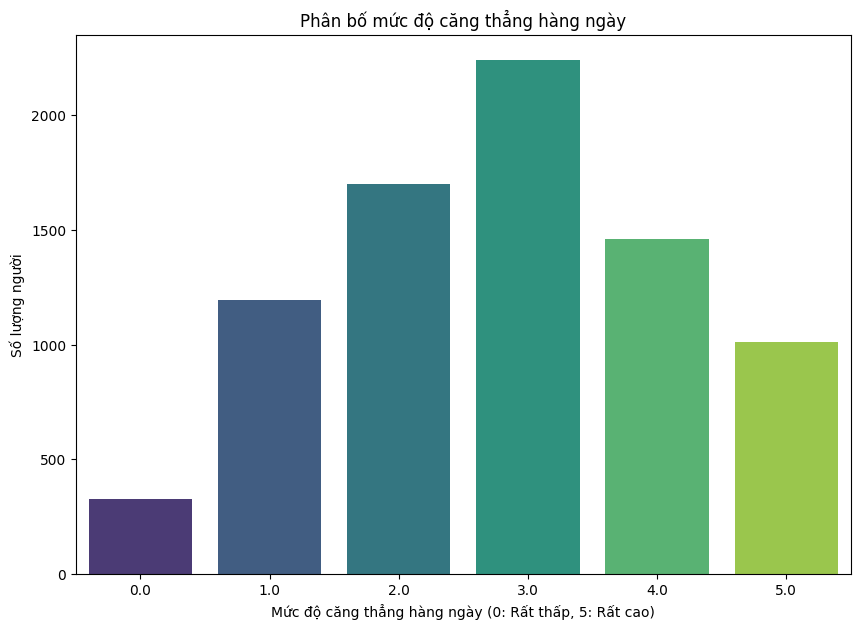

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_student, x='DAILY_STRESS', palette='viridis')
plt.title('Phân bố mức độ căng thẳng hàng ngày')
plt.xlabel('Mức độ căng thẳng hàng ngày (0: Rất thấp, 5: Rất cao)')
plt.ylabel('Số lượng người')
plt.show()

### Biểu đồ tần suất cho BMI_RANGE



/tmp/ipython-input-3025000149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, x="BMI_RANGE", palette="Set1")


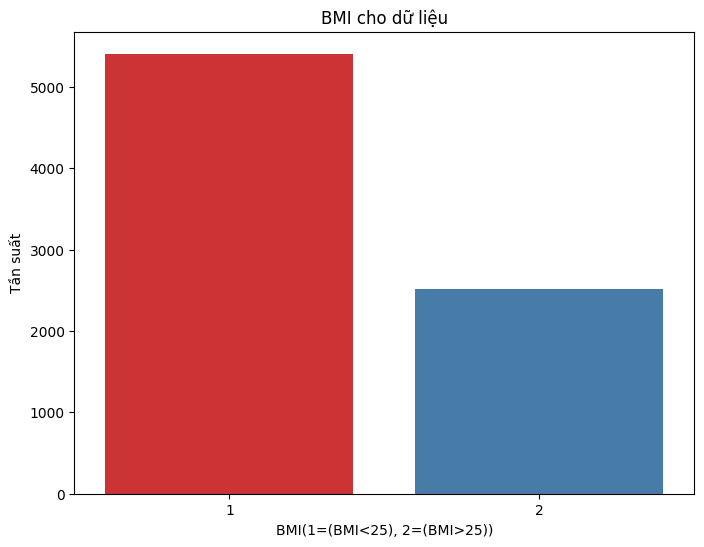

In [ ]:
plt.figure(figsize=(8, 6))
# Vẽ biểu đồ đếm với seaborn cho cột "Gender"
sns.countplot(data=df_student, x="BMI_RANGE", palette="Set1")

# Thêm tiêu đề và nhãn cho các trục
plt.title("BMI cho dữ liệu")
plt.xlabel("BMI(1=(BMI<25), 2=(BMI>25))")
plt.ylabel("Tần suất")

# Hiển thị biểu đồ
plt.show()

###Biều đồ tần xuất cho giới tính

/tmp/ipython-input-556117677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, x="GENDER", palette="Set1")


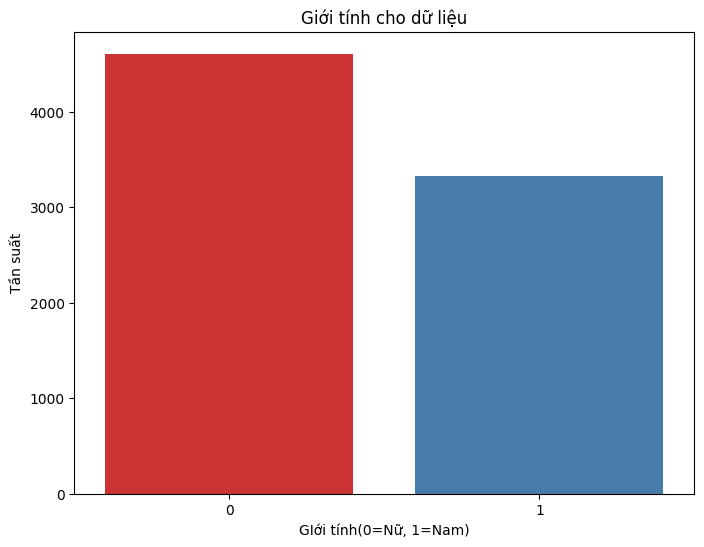

In [ ]:
plt.figure(figsize=(8, 6))
# Vẽ biểu đồ đếm với seaborn cho cột "Gender"
sns.countplot(data=df_student, x="GENDER", palette="Set1")

# Thêm tiêu đề và nhãn cho các trục
plt.title("Giới tính cho dữ liệu")
plt.xlabel("GIới tính(0=Nữ, 1=Nam)")
plt.ylabel("Tần suất")

# Hiển thị biểu đồ
plt.show()

### Biểu đồ Histogram phân bố dữ liệu cho các đặc trưng

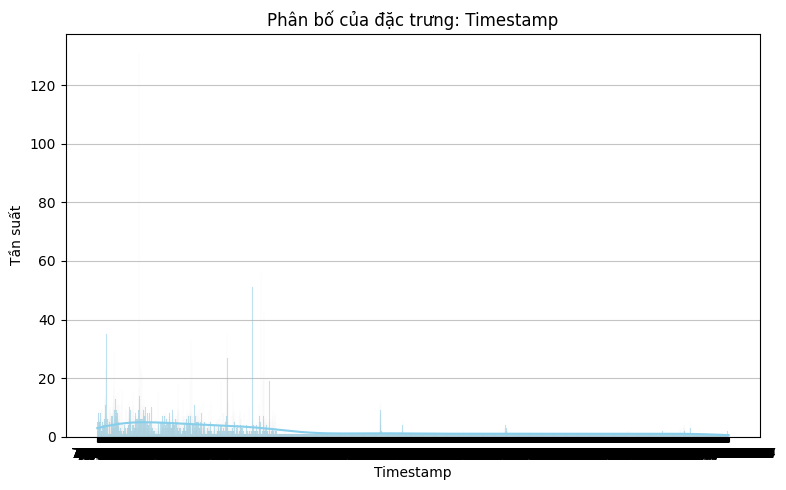

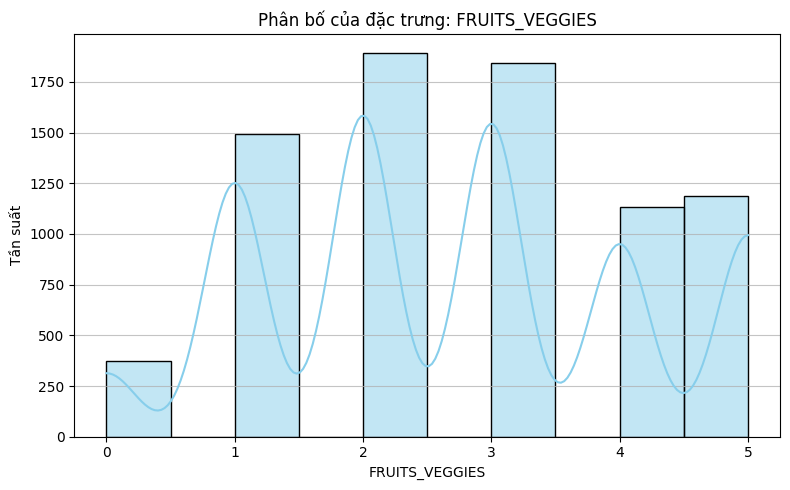

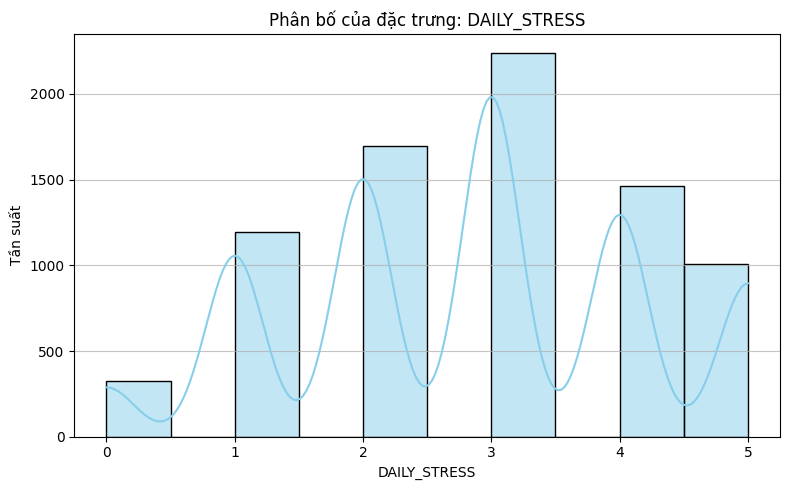

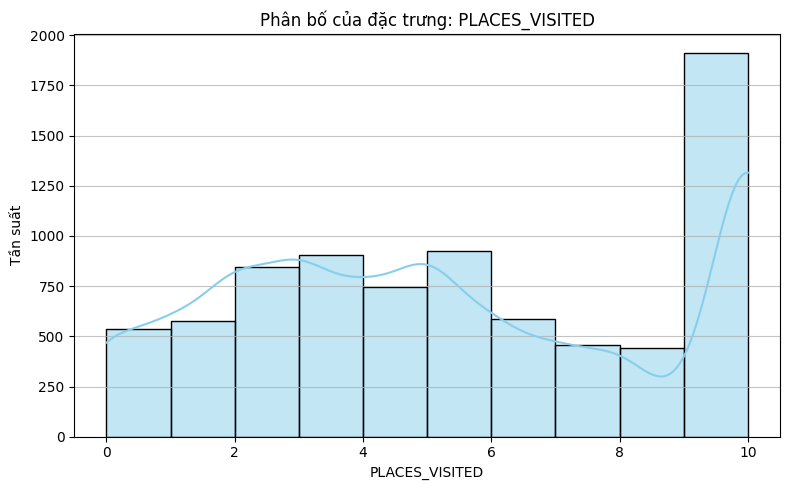

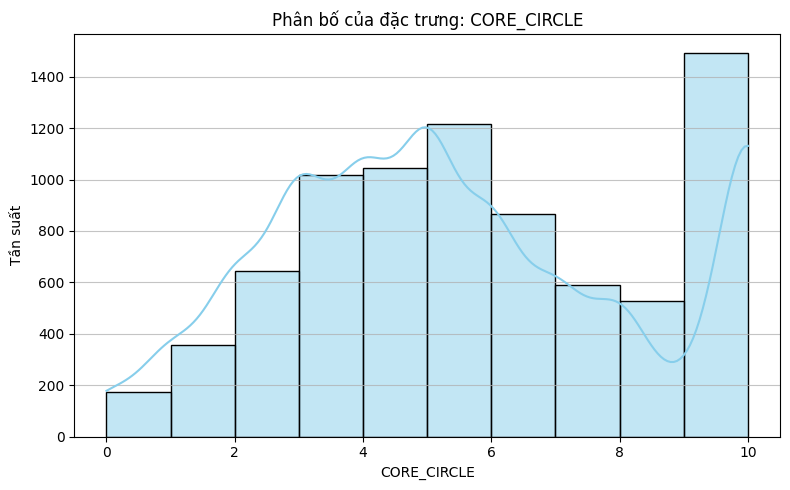

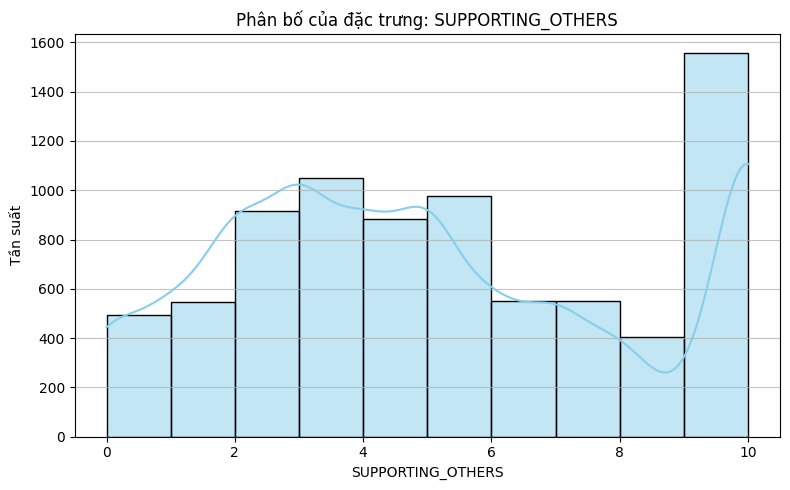

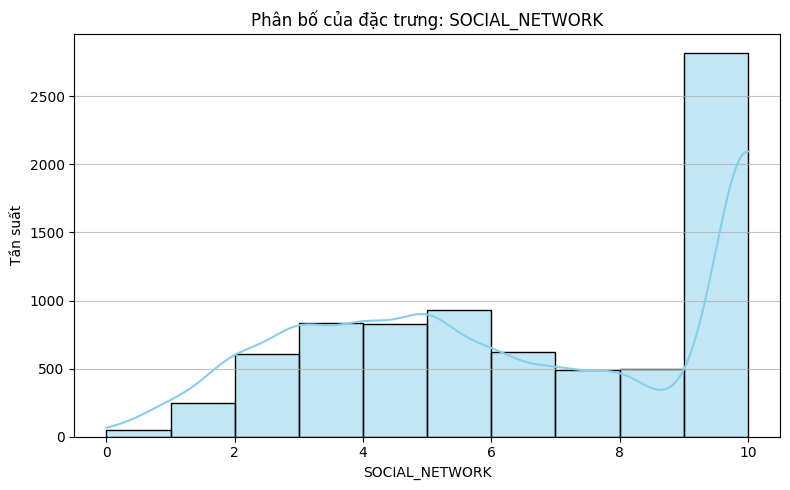

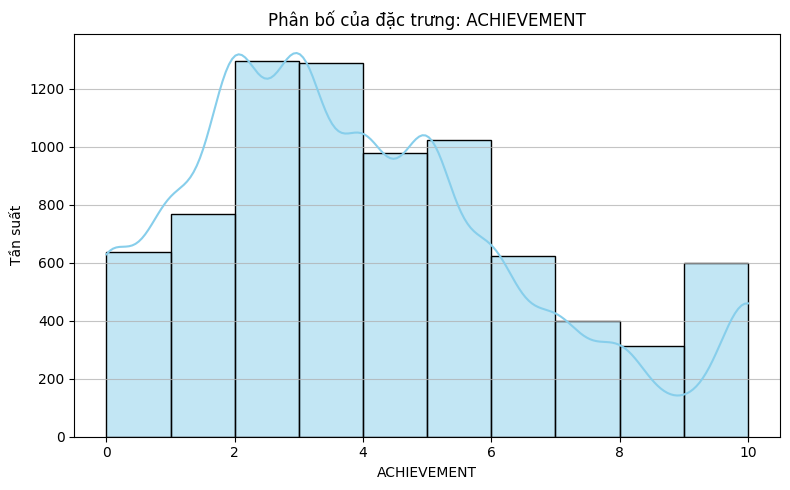

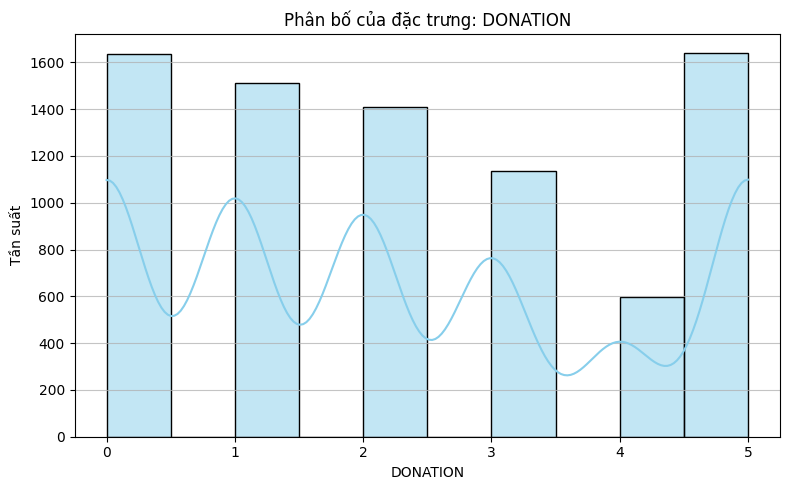

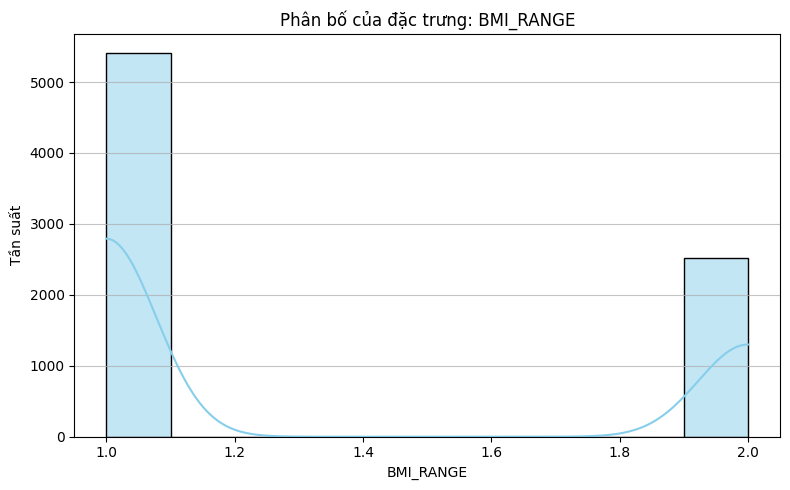

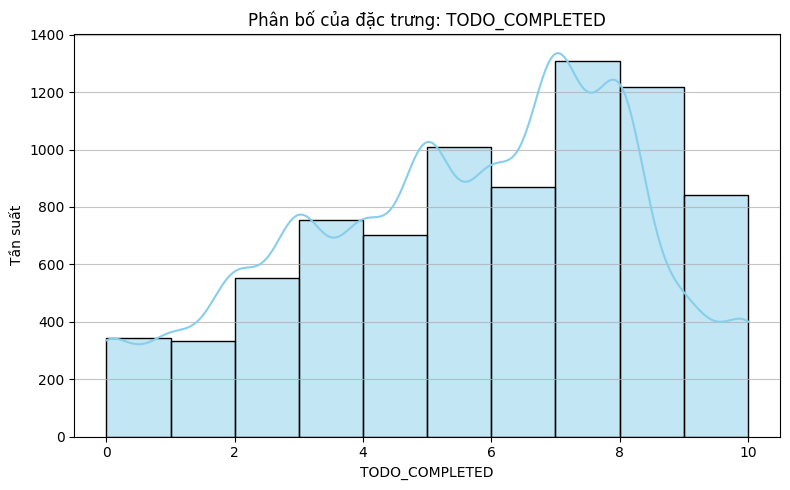

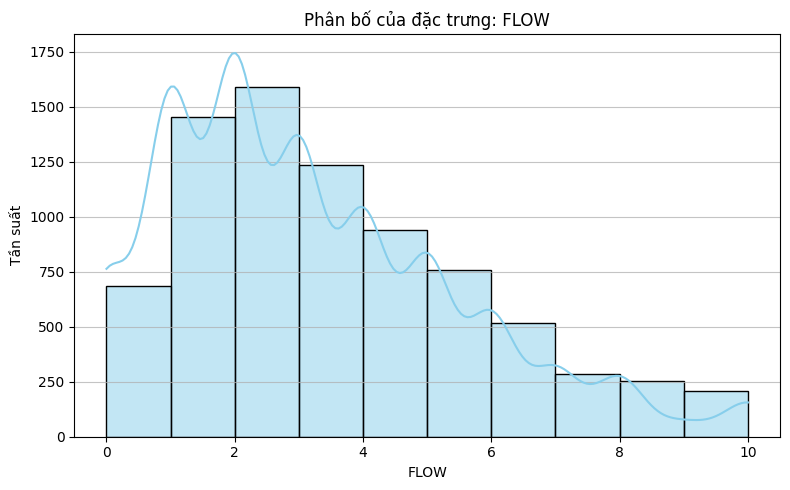

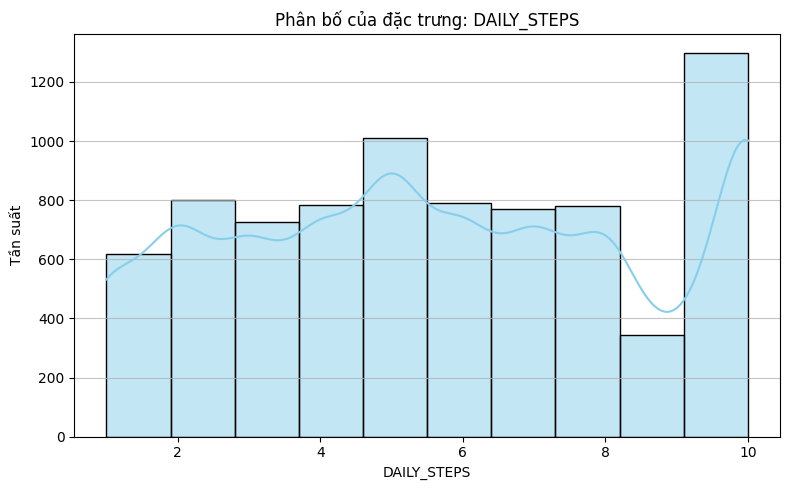

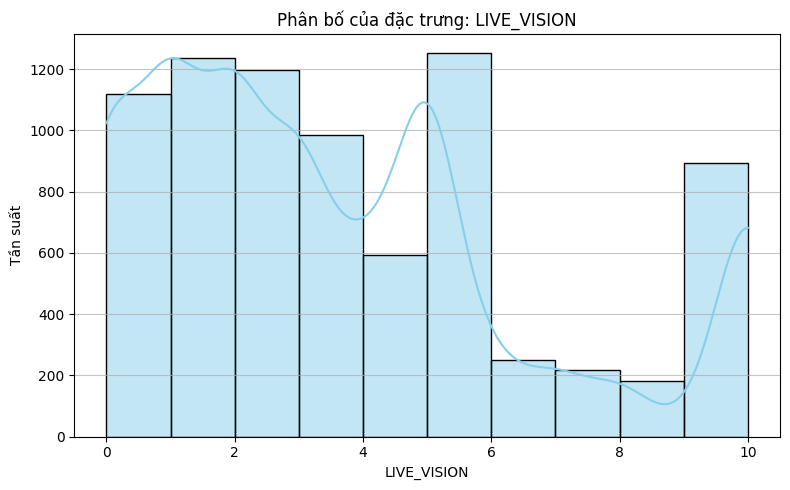

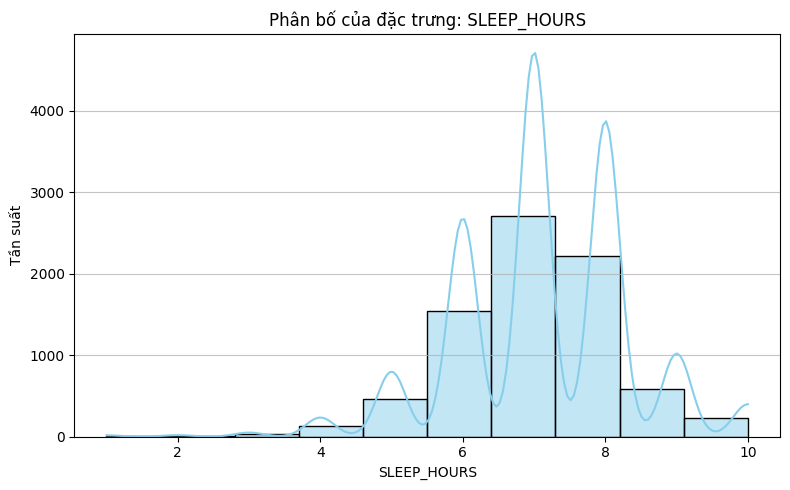

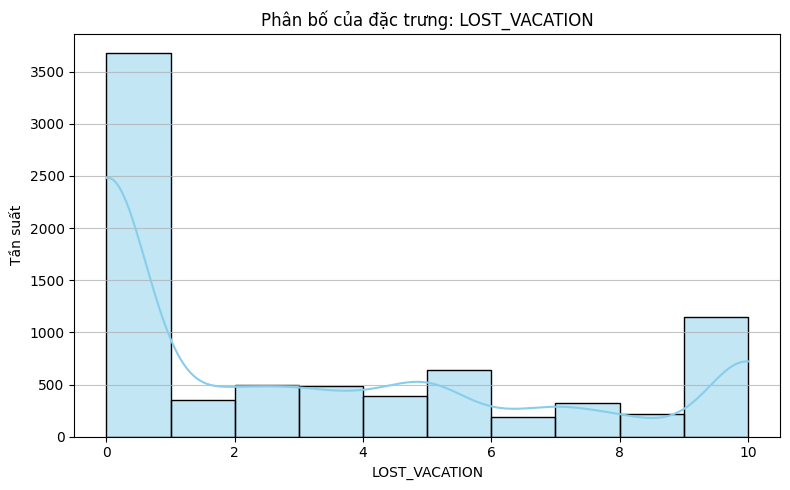

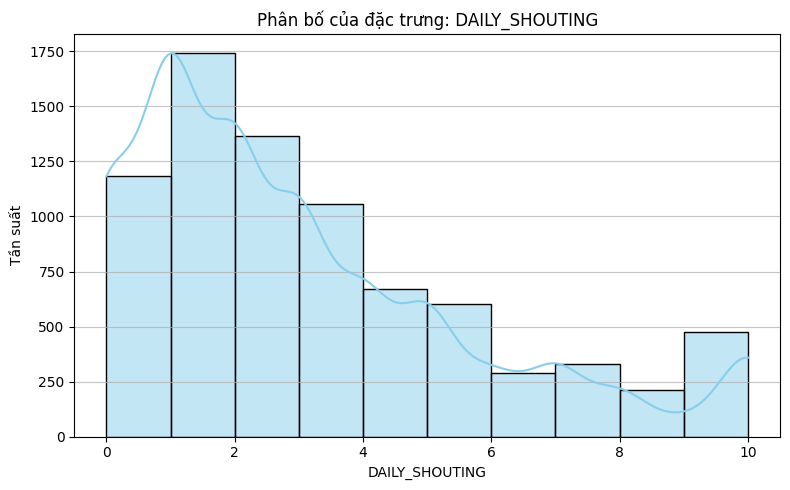

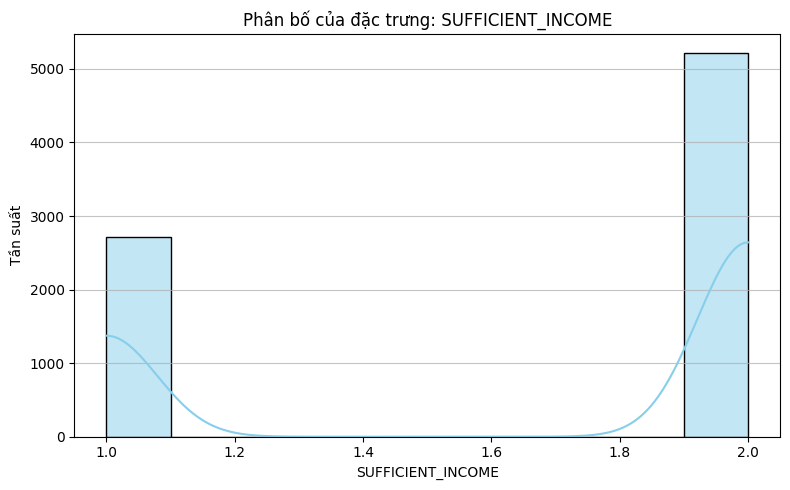

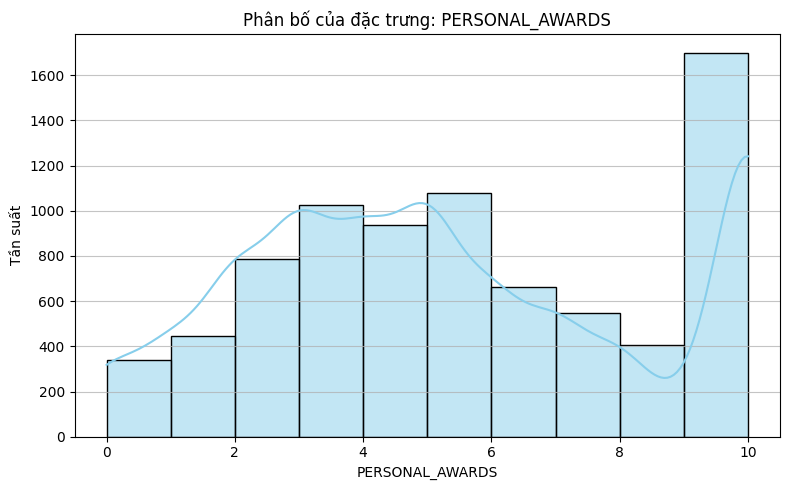

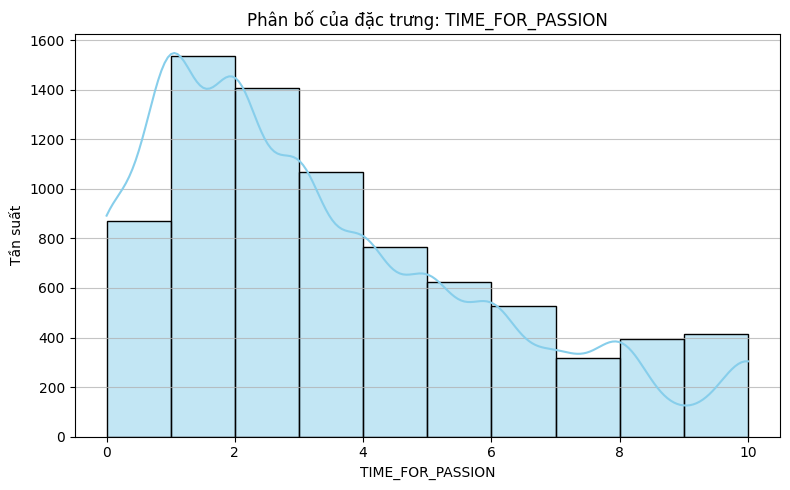

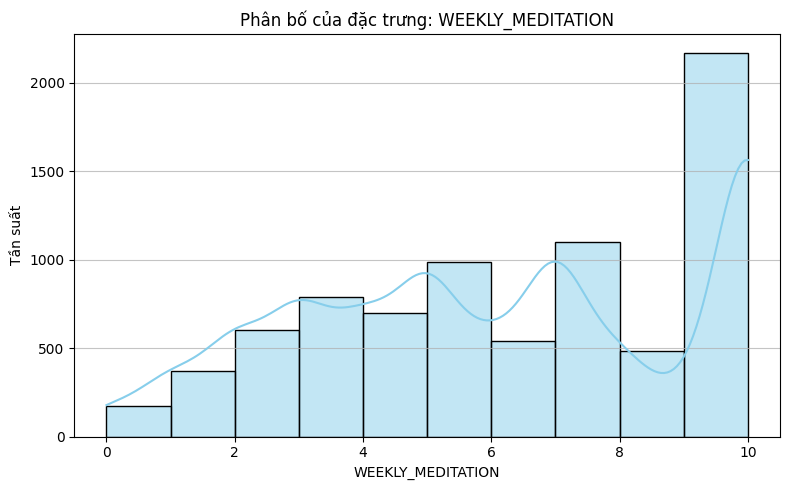

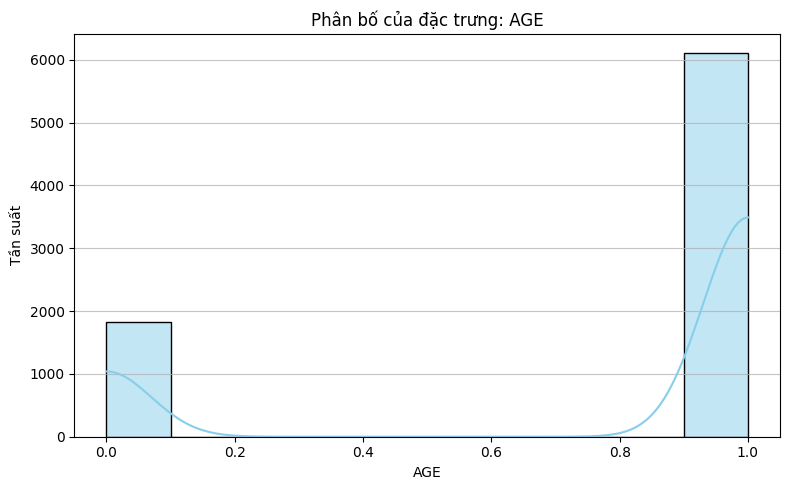

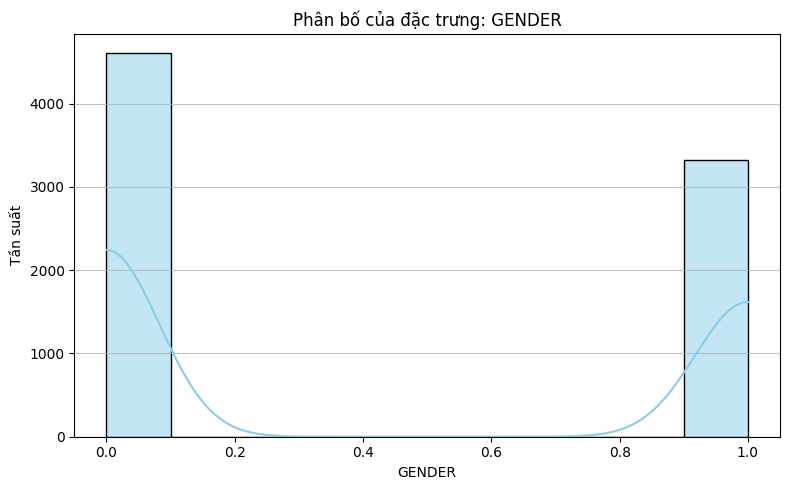

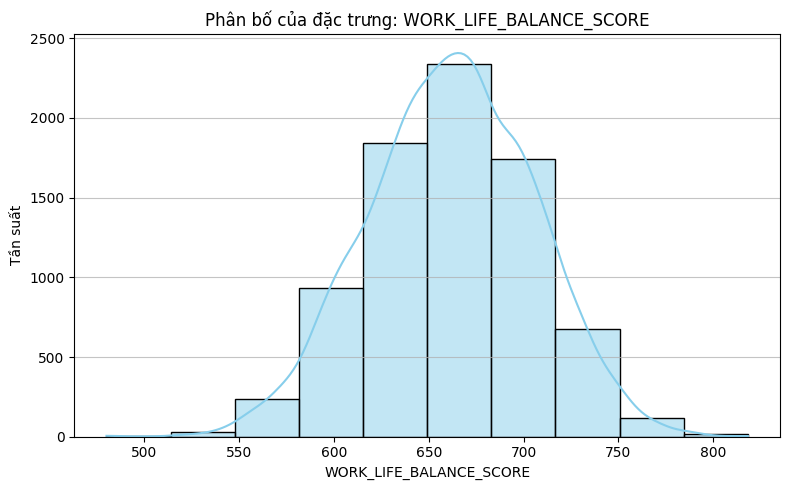

In [ ]:
for feature in df_student:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_student[feature], kde=True, bins=10, color='skyblue')
    plt.title(f'Phân bố của đặc trưng: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tần suất')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

###Biểu đồ pairplot

<Figure size 1500x1000 with 0 Axes>

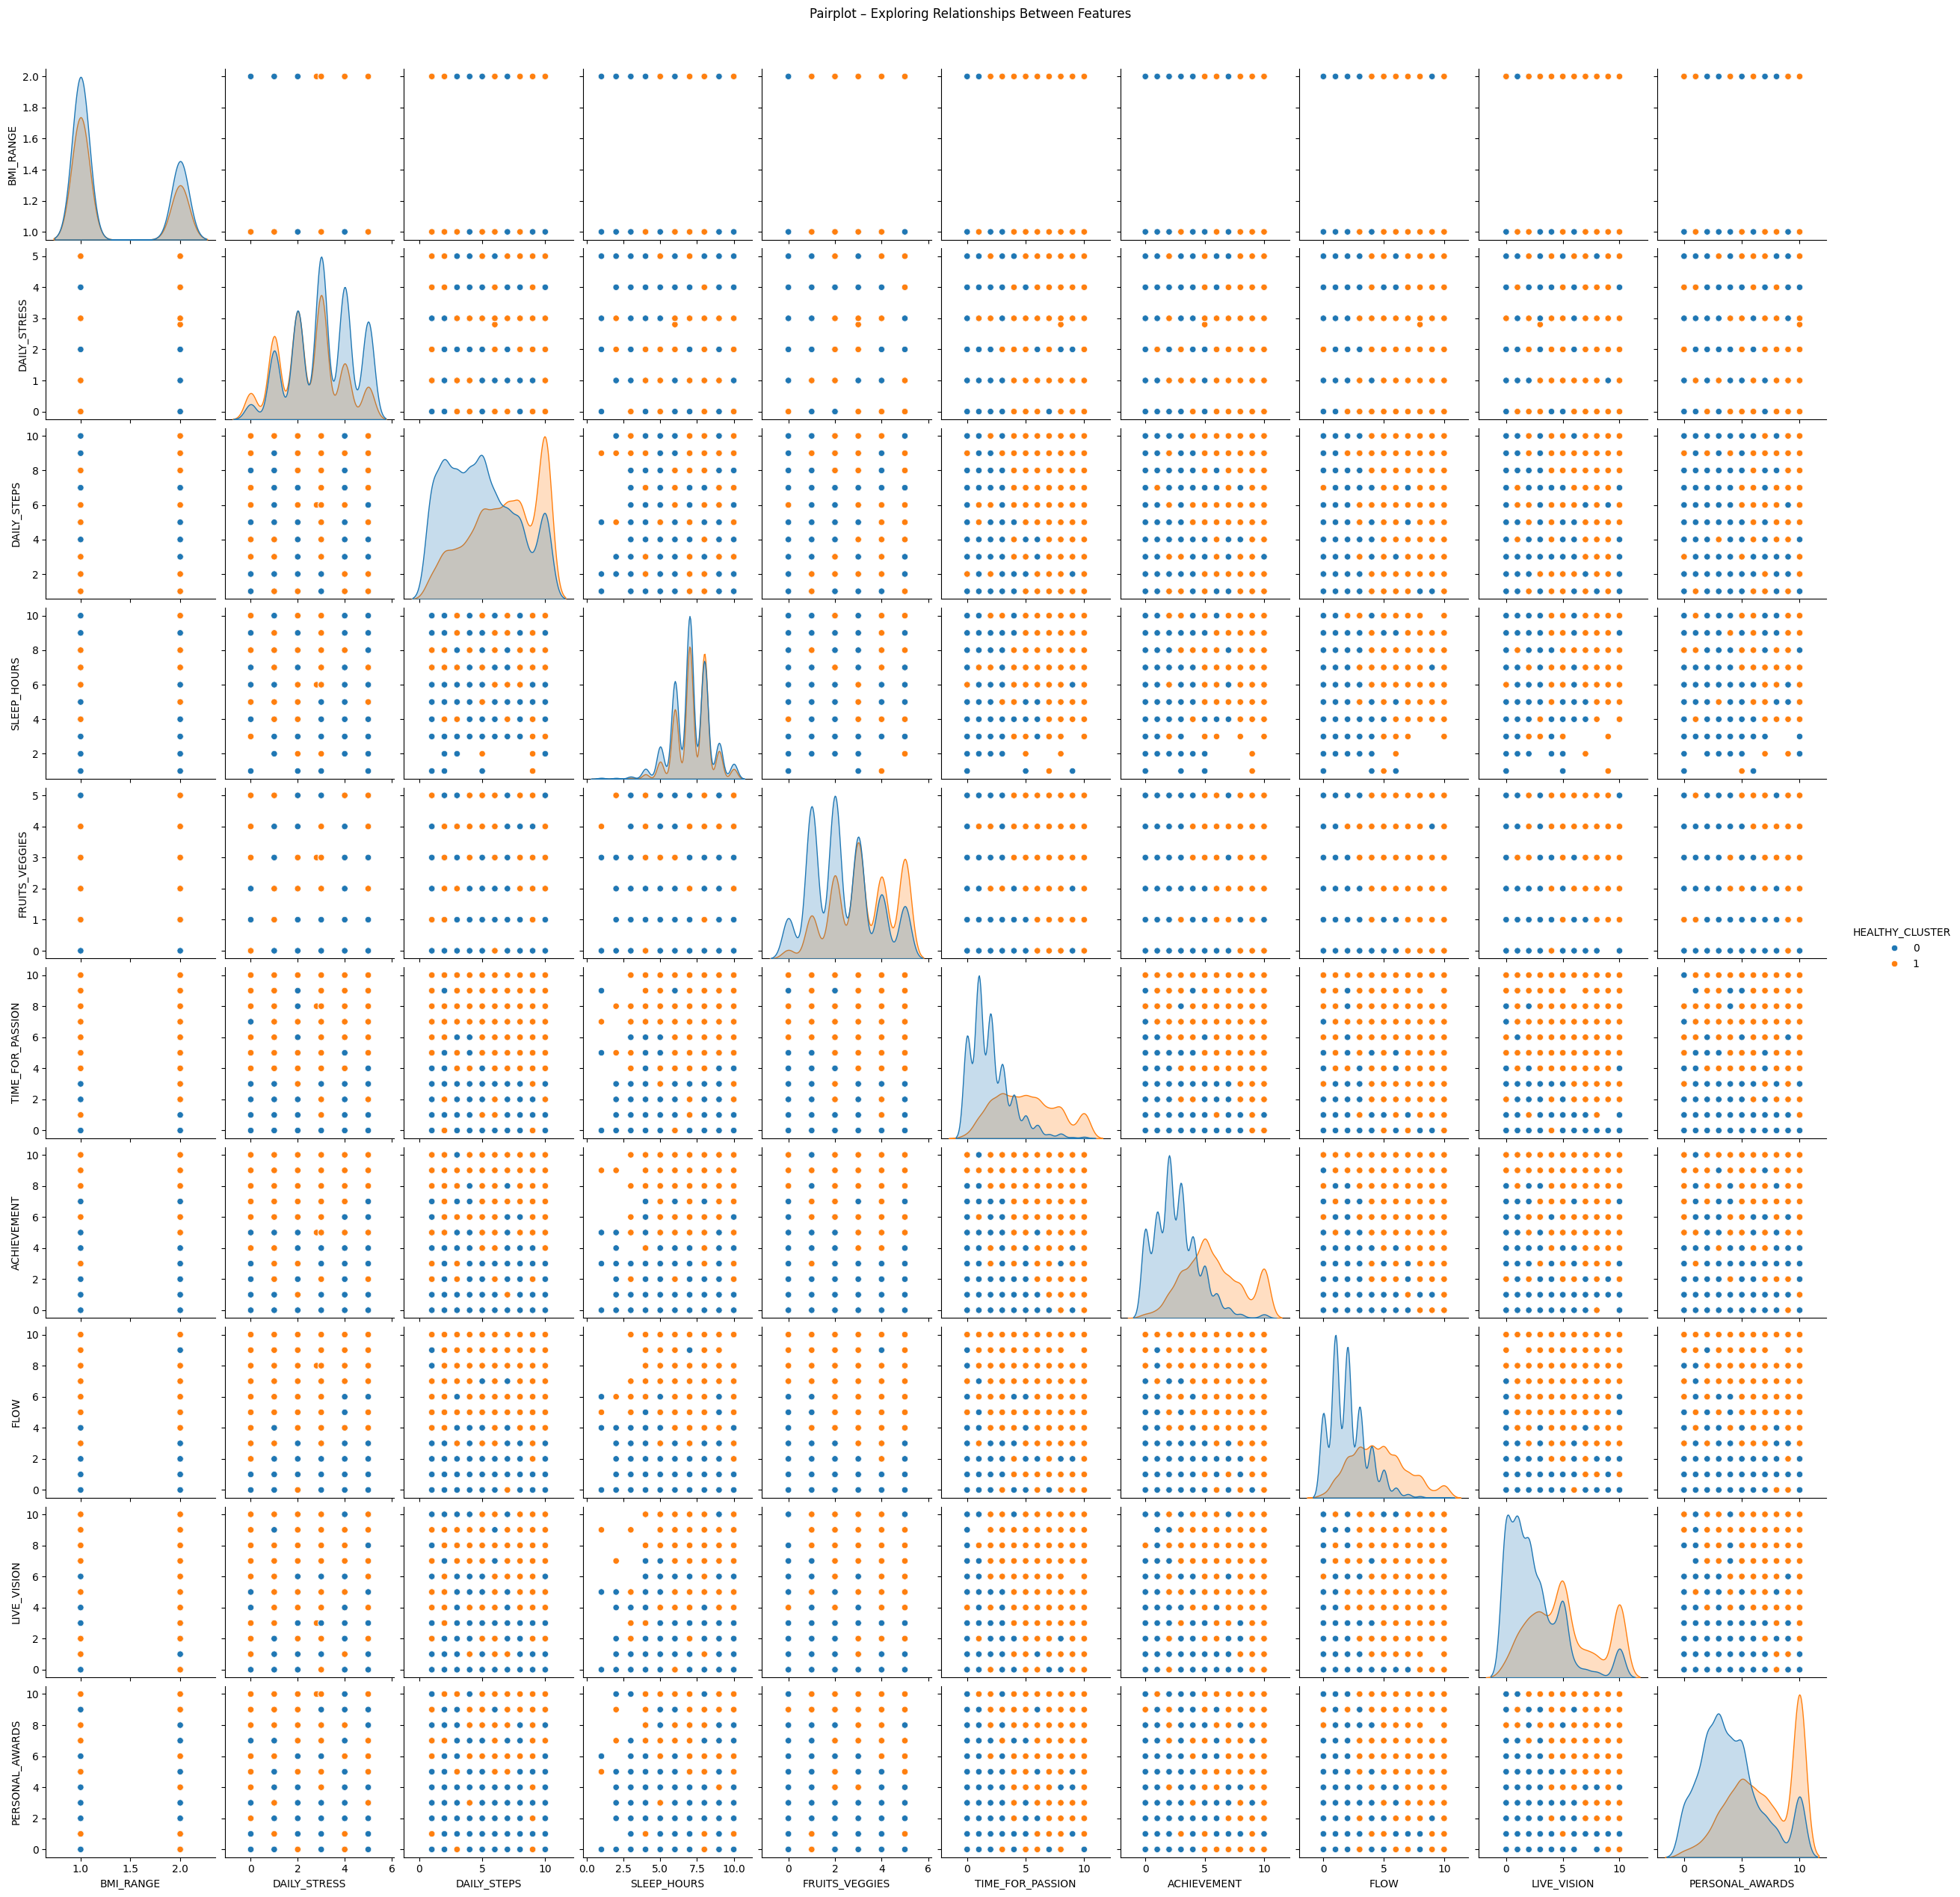

In [ ]:
plt.figure(figsize=(15, 10))

sns.pairplot(
    df_student,
    vars=[
        'BMI_RANGE',
        'DAILY_STRESS',
        'DAILY_STEPS',
        'SLEEP_HOURS',
        'FRUITS_VEGGIES',
        'TIME_FOR_PASSION',
        'ACHIEVEMENT',
        'FLOW',
        'LIVE_VISION',
        'PERSONAL_AWARDS'
    ],
    hue="HEALTHY_CLUSTER",
    diag_kind="kde"
)

plt.suptitle("Pairplot – Exploring Relationships Between Features", y=1.02)
plt.show()

###Xử lí ouliers

## Box Plot Nhóm 1: Thói quen ăn uống & Hoạt động thể chất




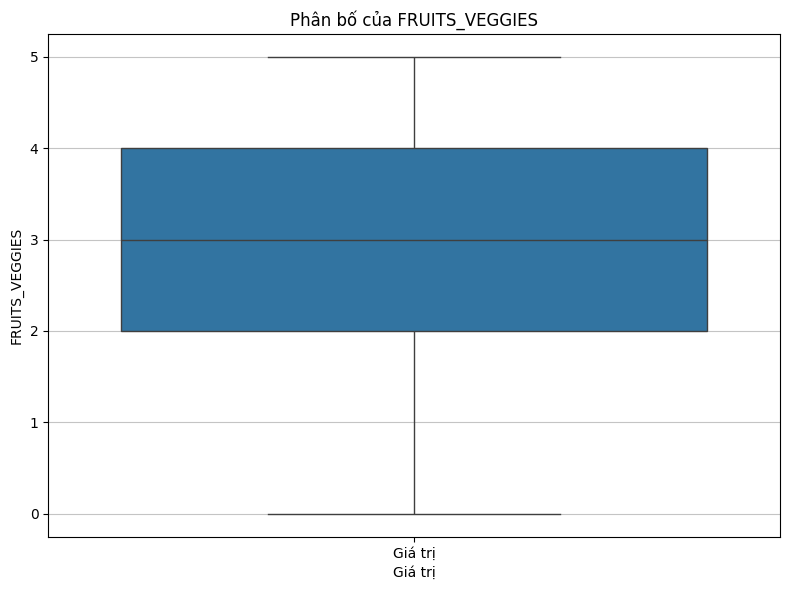

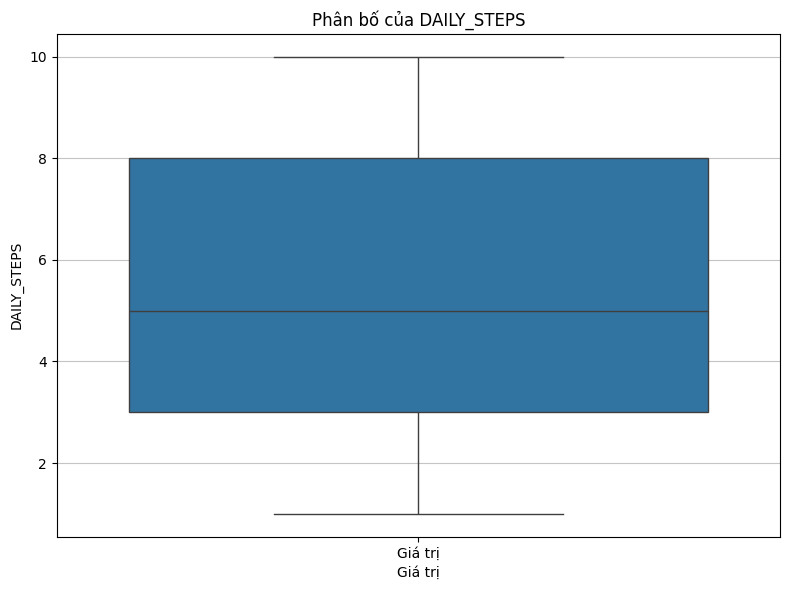

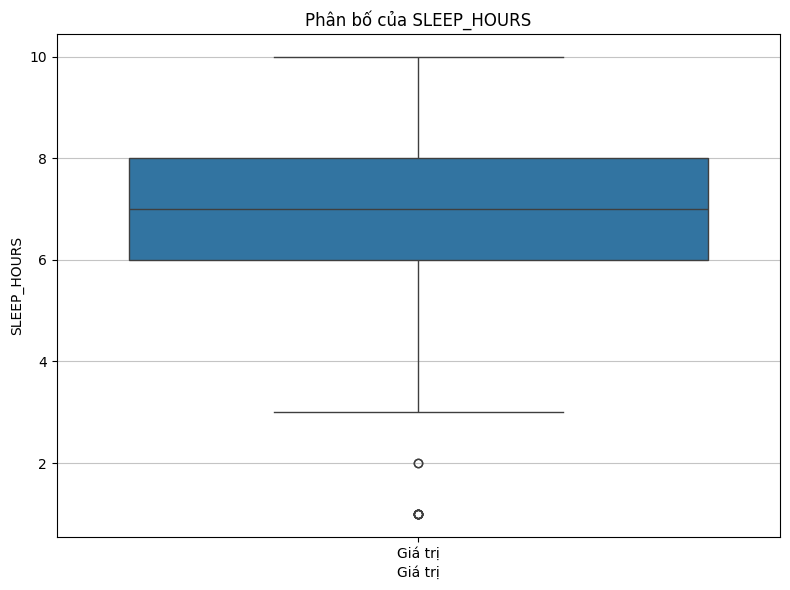

In [ ]:
features_to_plot = ['FRUITS_VEGGIES', 'DAILY_STEPS', 'SLEEP_HOURS']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    # Create a box plot for each feature.
    # The x-axis is set to a constant 'Giá trị' (Value) to fulfill the instruction for x-label.
    # The y-axis shows the distribution of the current feature.
    sns.boxplot(data=df_student, y=feature, x=pd.Series(['Giá trị'] * len(df_student), name='Category'))
    plt.title(f'Phân bố của {feature}')
    plt.xlabel('Giá trị')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

## Box Plot Nhóm 2: Căng thẳng & Chỉ số BMI




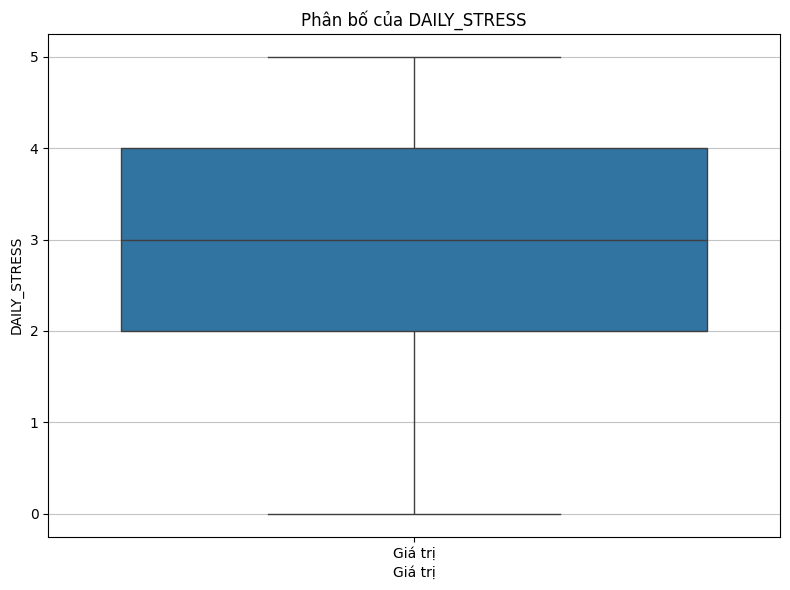

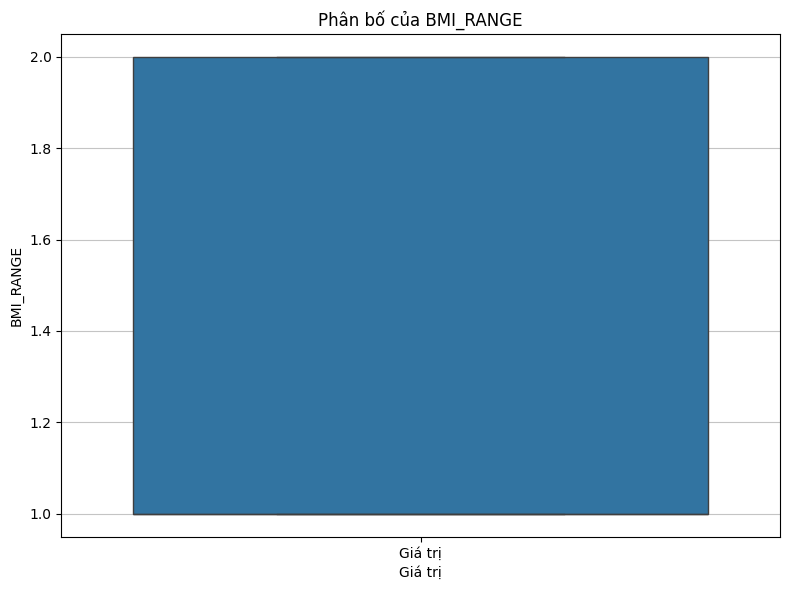

In [ ]:
features_to_plot_group2 = ['DAILY_STRESS', 'BMI_RANGE']

for feature in features_to_plot_group2:
    plt.figure(figsize=(8, 6))
    # Create a box plot for each feature.
    # The x-axis is set to a constant 'Giá trị' (Value) to fulfill the instruction for x-label.
    # The y-axis shows the distribution of the current feature.
    sns.boxplot(data=df_student, y=feature, x=pd.Series(['Giá trị'] * len(df_student), name='Category'))
    plt.title(f'Phân bố của {feature}')
    plt.xlabel('Giá trị')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

## Box Plot Nhóm 3: Kết nối xã hội & Hỗ trợ

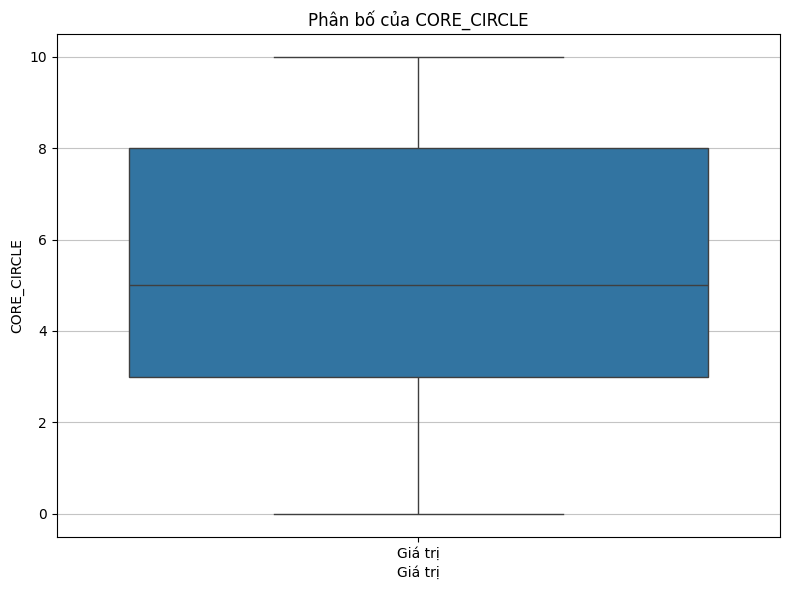

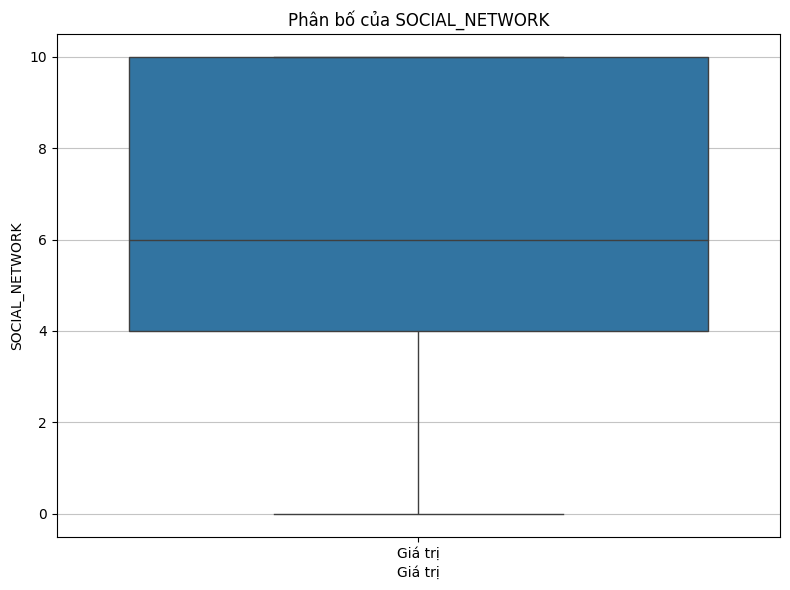

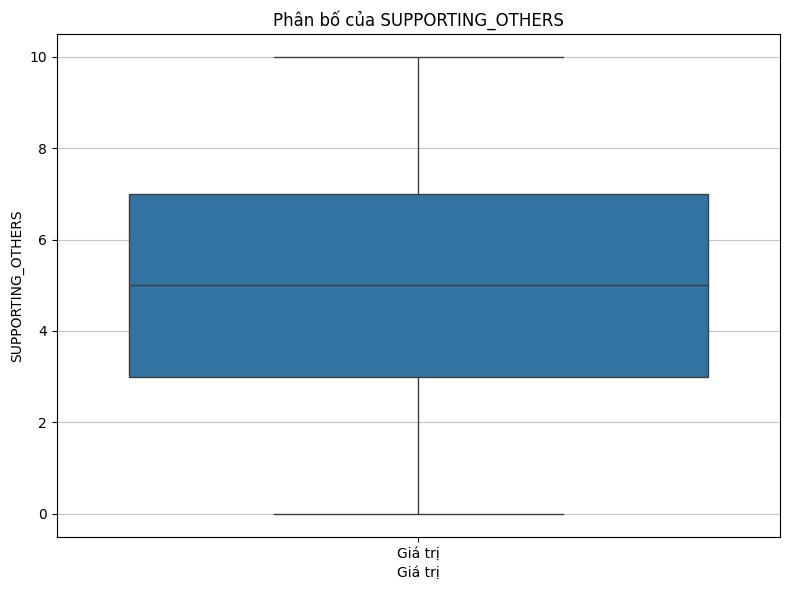

In [ ]:
features_to_plot_group3 = ['CORE_CIRCLE', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS']

for feature in features_to_plot_group3:
    plt.figure(figsize=(8, 6))
    # Create a box plot for each feature.
    # The x-axis is set to a constant 'Giá trị' (Value) to fulfill the instruction for x-label.
    # The y-axis shows the distribution of the current feature.
    sns.boxplot(data=df_student, y=feature, x=pd.Series(['Giá trị'] * len(df_student), name='Category'))
    plt.title(f'Phân bố của {feature}')
    plt.xlabel('Giá trị')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

## Box Plot Nhóm 4: Thành tựu & Trạng thái tinh thần

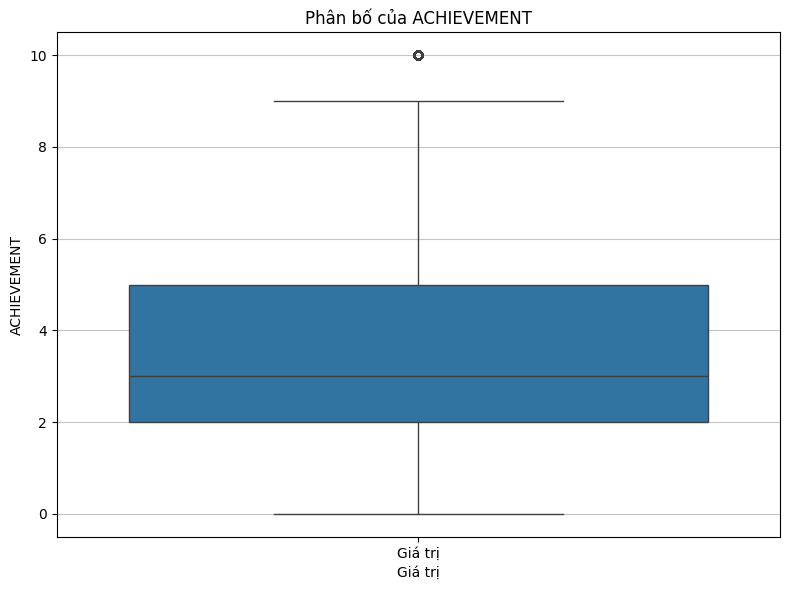

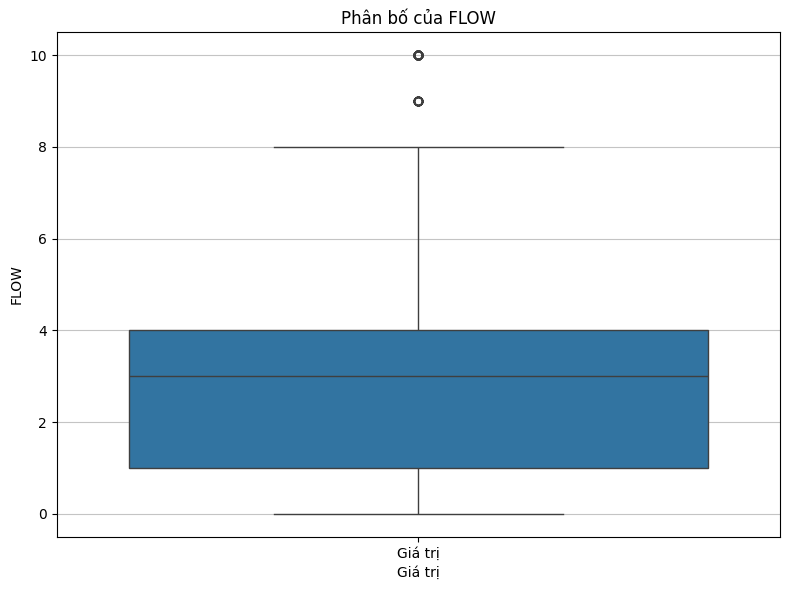

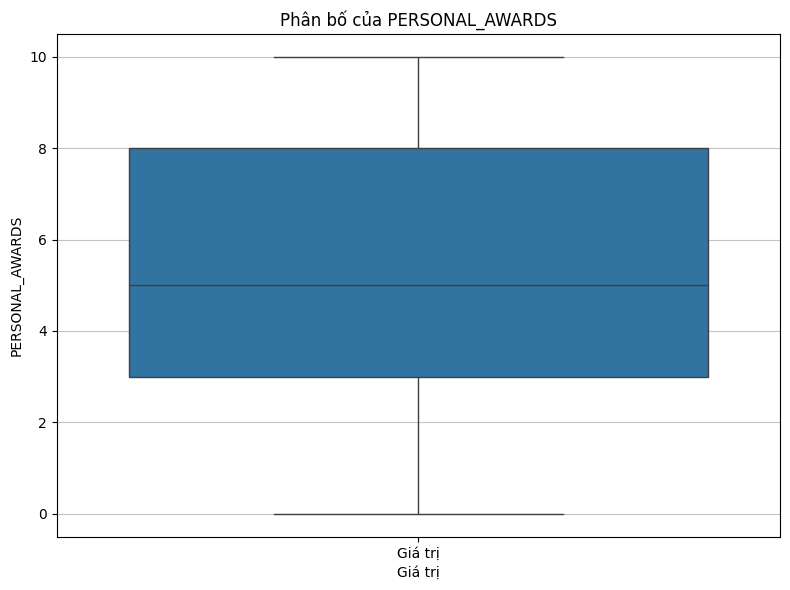

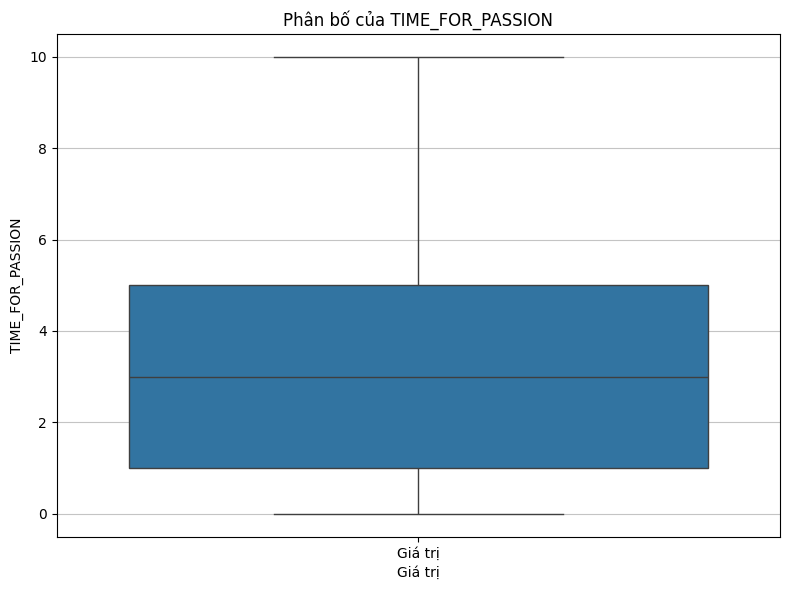

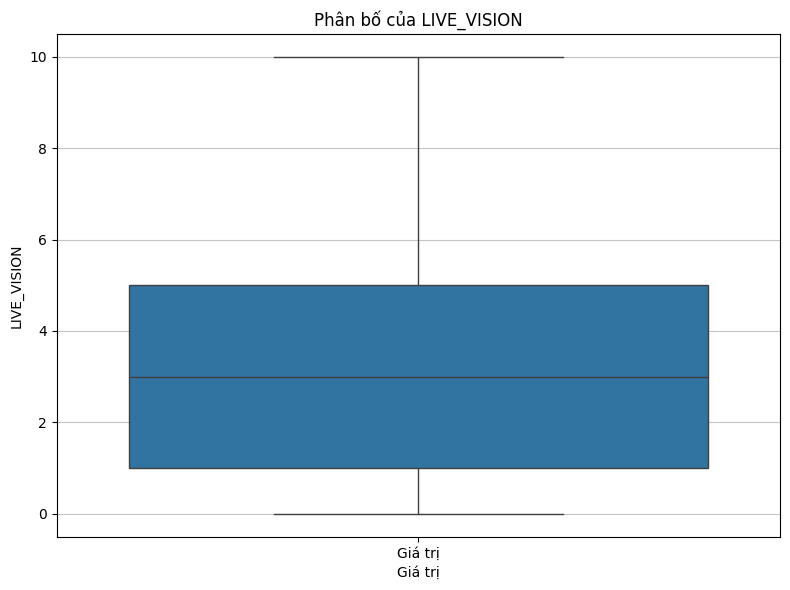

In [ ]:
features_to_plot_group4 = ['ACHIEVEMENT', 'FLOW', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'LIVE_VISION']

for feature in features_to_plot_group4:
    plt.figure(figsize=(8, 6))
    # Create a box plot for each feature.
    # The x-axis is set to a constant 'Giá trị' (Value) to fulfill the instruction for x-label.
    # The y-axis shows the distribution of the current feature.
    sns.boxplot(data=df_student, y=feature, x=pd.Series(['Giá trị'] * len(df_student), name='Category'))
    plt.title(f'Phân bố của {feature}')
    plt.xlabel('Giá trị')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

## Box Plot Nhóm 5: Các yếu tố khác

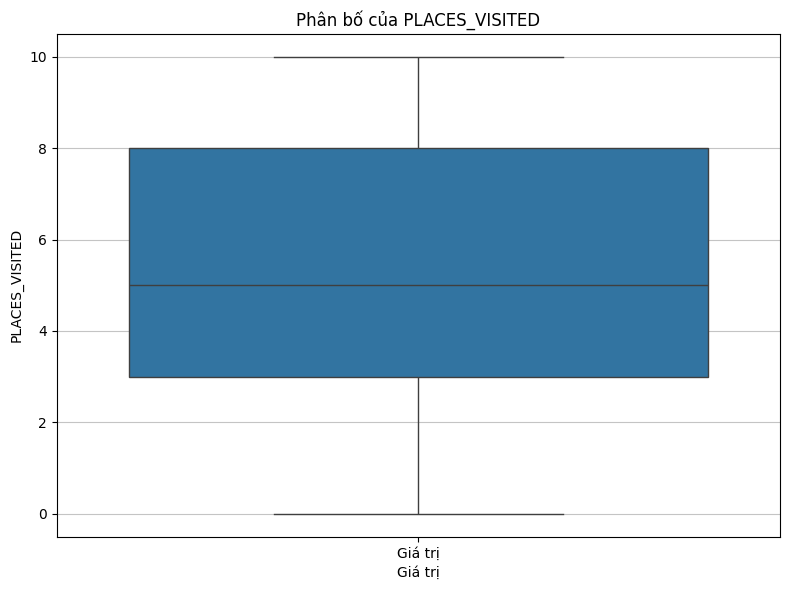

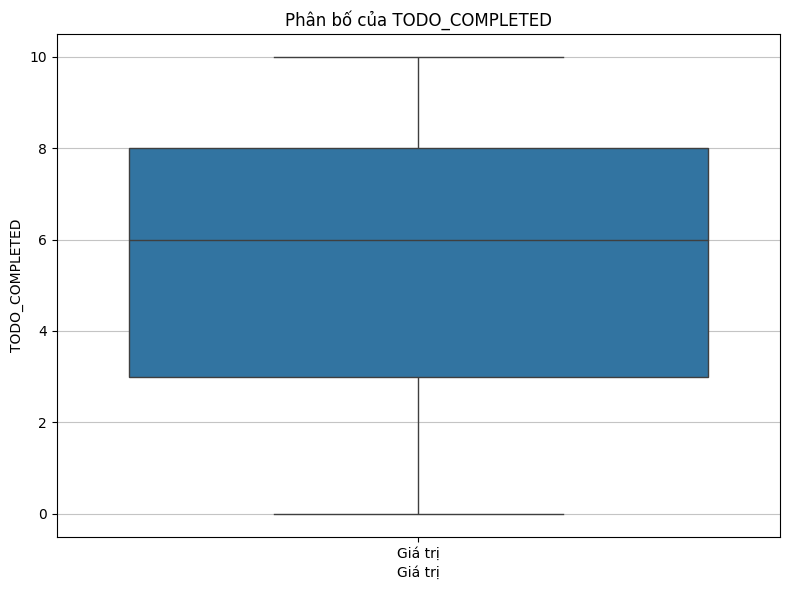

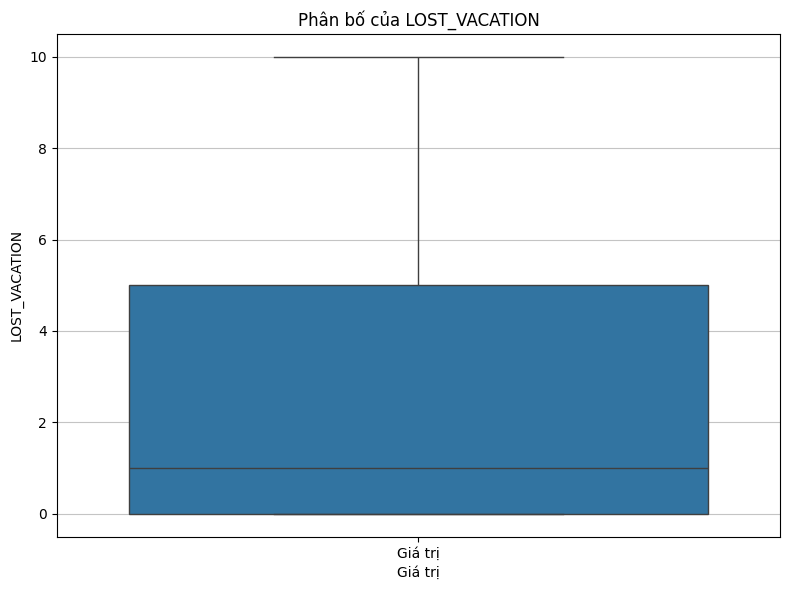

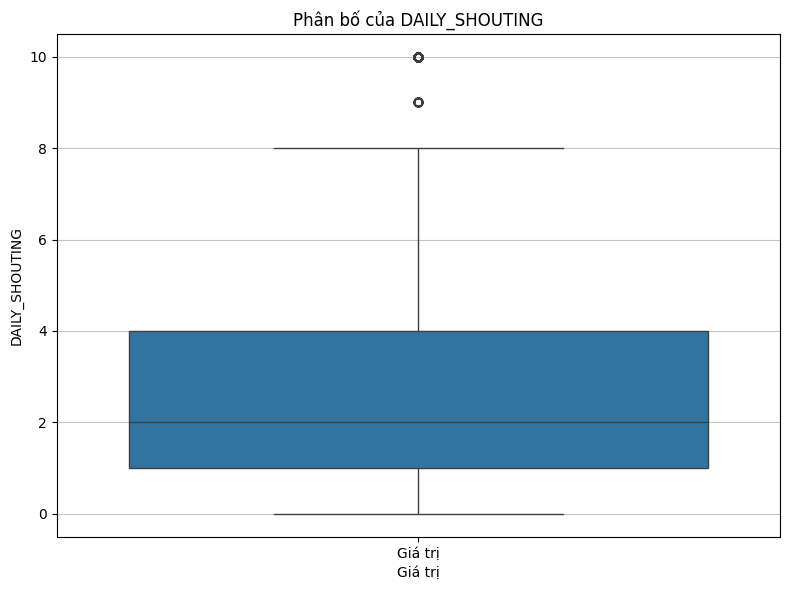

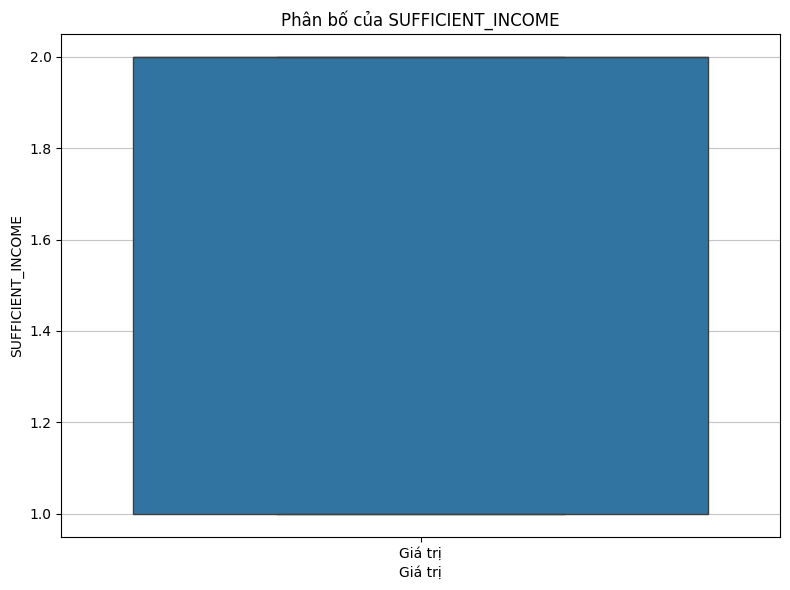

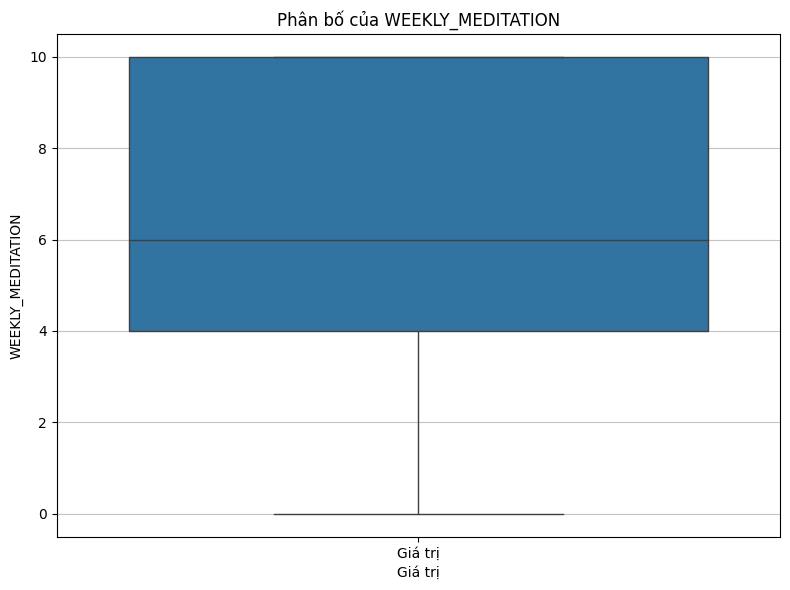

In [ ]:
features_to_plot_group5 = ['PLACES_VISITED', 'TODO_COMPLETED', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'WEEKLY_MEDITATION']

for feature in features_to_plot_group5:
    plt.figure(figsize=(8, 6))
    # Create a box plot for each feature.
    # The x-axis is set to a constant 'Giá trị' (Value) to fulfill the instruction for x-label.
    # The y-axis shows the distribution of the current feature.
    sns.boxplot(data=df_student, y=feature, x=pd.Series(['Giá trị'] * len(df_student), name='Category'))
    plt.title(f'Phân bố của {feature}')
    plt.xlabel('Giá trị')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

In [ ]:
def check_outlier(col):
    Q1 = df_student[col].quantile(0.25)
    Q3 = df_student[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_student[(df_student[col] < lower) | (df_student[col] > upper)]
    print(col, "→ số outlier:", len(outliers))

check_outlier("DAILY_STEPS")
check_outlier("FRUITS_VEGGIES")
check_outlier("SLEEP_HOURS")


DAILY_STEPS → số outlier: 0
FRUITS_VEGGIES → số outlier: 0
SLEEP_HOURS → số outlier: 21


In [ ]:
df_student.isnull().sum()

,0
Timestamp,0
FRUITS_VEGGIES,0
DAILY_STRESS,0
PLACES_VISITED,0
CORE_CIRCLE,0
SUPPORTING_OTHERS,0
SOCIAL_NETWORK,0
ACHIEVEMENT,0
DONATION,0
BMI_RANGE,0


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7927 entries, 7 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                7927 non-null   object 
 1   FRUITS_VEGGIES           7927 non-null   int64  
 2   DAILY_STRESS             7927 non-null   object 
 3   PLACES_VISITED           7927 non-null   int64  
 4   CORE_CIRCLE              7927 non-null   int64  
 5   SUPPORTING_OTHERS        7927 non-null   int64  
 6   SOCIAL_NETWORK           7927 non-null   int64  
 7   ACHIEVEMENT              7927 non-null   int64  
 8   DONATION                 7927 non-null   int64  
 9   BMI_RANGE                7927 non-null   int64  
 10  TODO_COMPLETED           7927 non-null   int64  
 11  FLOW                     7927 non-null   int64  
 12  DAILY_STEPS              7927 non-null   int64  
 13  LIVE_VISION              7927 non-null   int64  
 14  SLEEP_HOURS              792

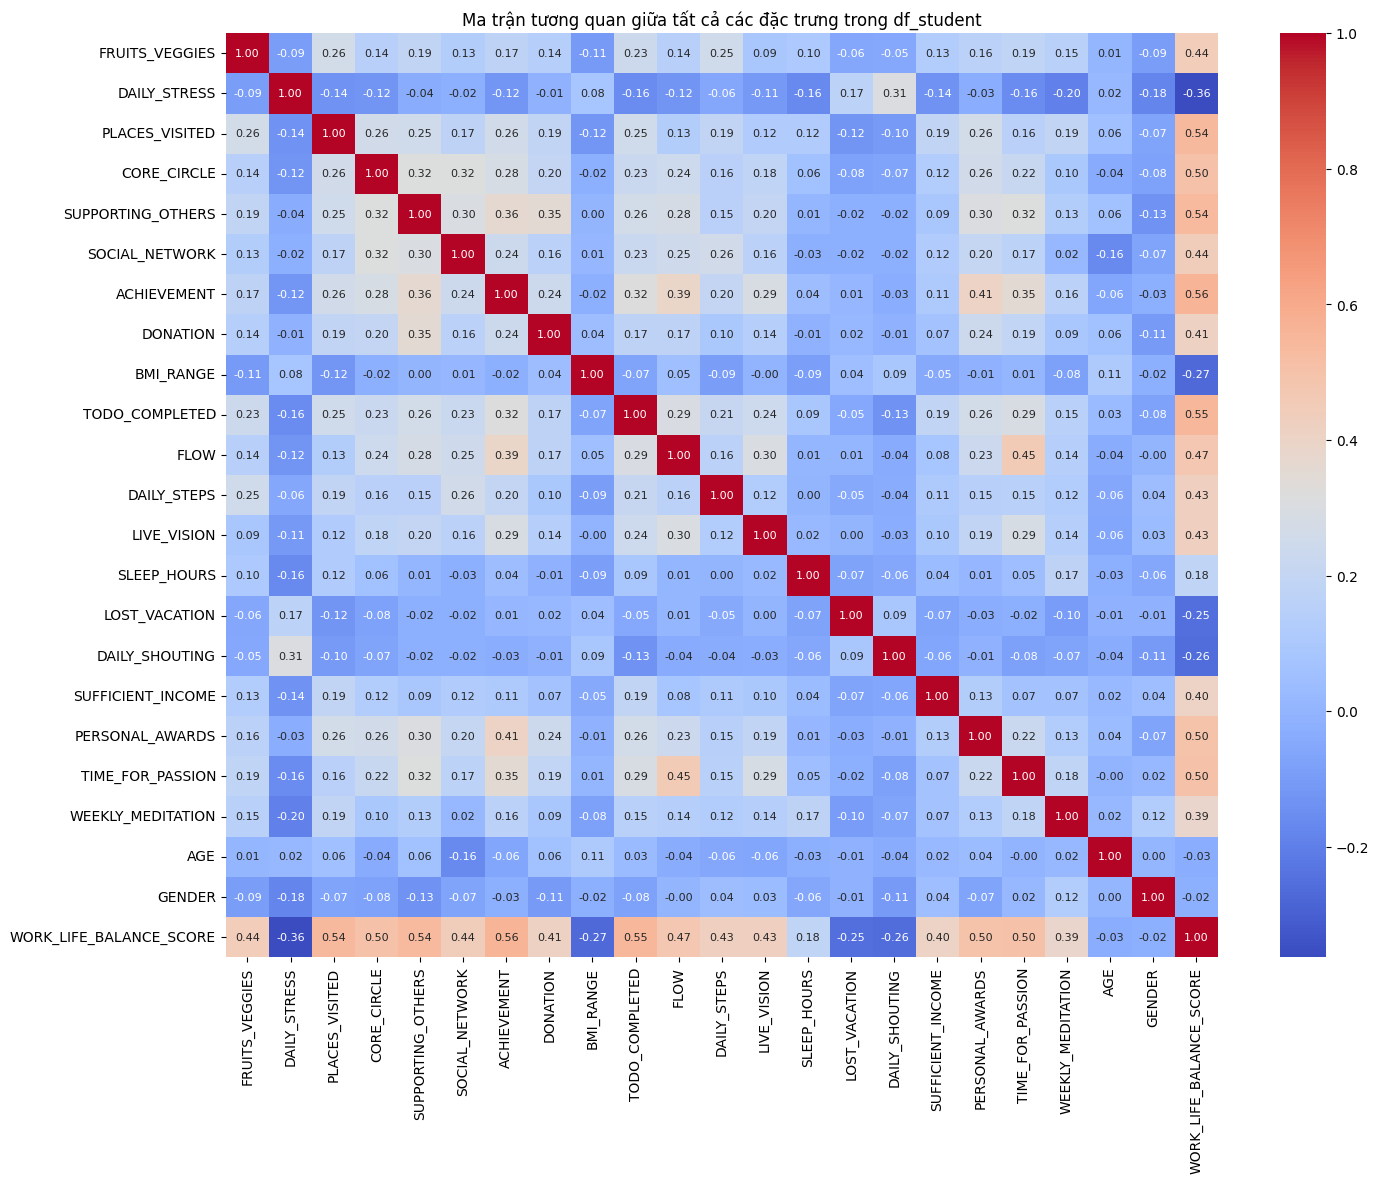

In [ ]:
full_correlation_matrix = df_student.corr(numeric_only=True)

plt.figure(figsize=(16, 12)) # Tăng kích thước hình để dễ đọc hơn
sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={
        'fontsize': 8
    }) # Điều chỉnh cỡ chữ cho các giá trị chú thích
plt.title('Ma trận tương quan giữa tất cả các đặc trưng trong df_student')
plt.show()

###Train and Valid

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. CHUẨN BỊ DỮ LIỆU

features_selected = [
    'BMI_RANGE',
    'DAILY_STRESS',
    'DAILY_STEPS',
    'SLEEP_HOURS',
    'FRUITS_VEGGIES',
    'TIME_FOR_PASSION',
    'ACHIEVEMENT',
    'FLOW',
    'LIVE_VISION',
    'PERSONAL_AWARDS'
]

X_cluster = df_student[features_selected].copy()

# Scale để clustering chính xác hơn
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 2. KMEANS CLUSTERING


kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df_student["HEALTHY_CLUSTER"] = cluster_labels

# 3. XÁC ĐỊNH CLUSTER HEALTHY

healthy_group = (
    df_student.groupby("HEALTHY_CLUSTER")[[
        "DAILY_STEPS",
        "SLEEP_HOURS",
        "DAILY_STRESS",
        "FRUITS_VEGGIES"
    ]]
    .mean()
    .sum(axis=1)
    .idxmax()
)

df_student["HEALTHY_CLUSTER"] = df_student["HEALTHY_CLUSTER"].apply(
    lambda x: 1 if x == healthy_group else 0
)

# 4. TÁCH TRAIN – VALID – TEST

X = df_student[features_selected]
y = df_student["HEALTHY_CLUSTER"]

# 60% Train – 40% Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 20% Validation – 20% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", len(X_train))
print("Validation:", len(X_val))
print("Test:", len(X_test))

# Scale để dùng cho các model
scaler2 = StandardScaler()
X_train_s = scaler2.fit_transform(X_train)
X_val_s = scaler2.transform(X_val)
X_test_s = scaler2.transform(X_test)


Train: 4756
Validation: 1585
Test: 1586


[LOGISTIC REGRESSION]
Train | Acc: 0.9979 | Prec: 0.9985 | Rec: 0.9966 | F1: 0.9976
Valid | Acc: 0.9968 | Prec: 1.0000 | Rec: 0.9927 | F1: 0.9963



<Figure size 600x500 with 0 Axes>

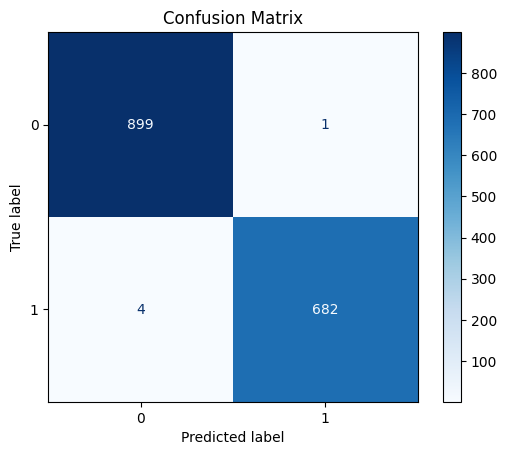

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train model
log_model = LogisticRegression()
log_model.fit(X_train_s, y_train)

# Predict
log_train = log_model.predict(X_train_s)
log_val = log_model.predict(X_val_s)
log_test = log_model.predict(X_test_s)

print(f"[LOGISTIC REGRESSION]")

print(f"Train | Acc: {accuracy_score(y_train, log_train):.4f} | "
      f"Prec: {precision_score(y_train, log_train):.4f} | "
      f"Rec: {recall_score(y_train, log_train):.4f} | "
      f"F1: {f1_score(y_train, log_train):.4f}")

print(f"Valid | Acc: {accuracy_score(y_val, log_val):.4f} | "
      f"Prec: {precision_score(y_val, log_val):.4f} | "
      f"Rec: {recall_score(y_val, log_val):.4f} | "
      f"F1: {f1_score(y_val, log_val):.4f}\n")



# Predict trên test
y_pred = log_model.predict(X_test_s)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()



[KNN]
Train | Acc: 0.9653 | Prec: 0.9692 | Rec: 0.9499 | F1: 0.9595
Valid | Acc: 0.9388 | Prec: 0.9455 | Rec: 0.9109 | F1: 0.9279



<Figure size 600x500 with 0 Axes>

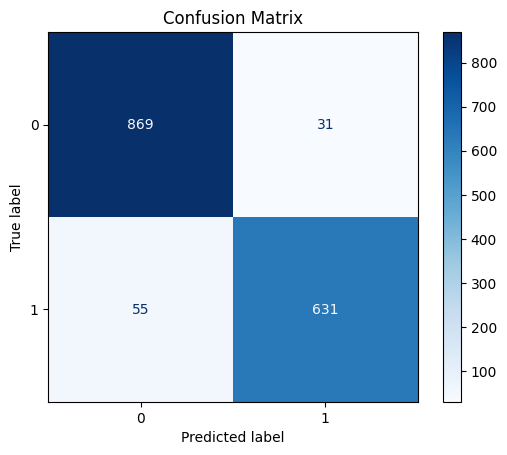

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_s, y_train)

knn_train = knn_model.predict(X_train_s)
knn_val = knn_model.predict(X_val_s)
knn_test = knn_model.predict(X_test_s)

print(f"[KNN]")

print(f"Train | Acc: {accuracy_score(y_train, knn_train):.4f} | "
      f"Prec: {precision_score(y_train, knn_train):.4f} | "
      f"Rec: {recall_score(y_train, knn_train):.4f} | "
      f"F1: {f1_score(y_train, knn_train):.4f}")

print(f"Valid | Acc: {accuracy_score(y_val, knn_val):.4f} | "
      f"Prec: {precision_score(y_val, knn_val):.4f} | "
      f"Rec: {recall_score(y_val, knn_val):.4f} | "
      f"F1: {f1_score(y_val, knn_val):.4f}\n")


# Predict trên test
y_pred = knn_model.predict(X_test_s)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

[DECISION TREE]
Train | Acc: 0.8942 | Prec: 0.8936 | Rec: 0.8576 | F1: 0.8752
Valid | Acc: 0.8574 | Prec: 0.8451 | Rec: 0.8204 | F1: 0.8326



<Figure size 600x500 with 0 Axes>

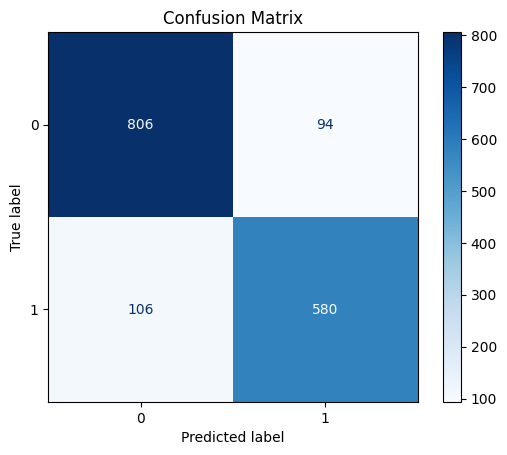

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train_s, y_train)

tree_train = tree_model.predict(X_train_s)
tree_val = tree_model.predict(X_val_s)
tree_test = tree_model.predict(X_test_s)

print(f"[DECISION TREE]")

print(f"Train | Acc: {accuracy_score(y_train, tree_train):.4f} | "
      f"Prec: {precision_score(y_train, tree_train):.4f} | "
      f"Rec: {recall_score(y_train, tree_train):.4f} | "
      f"F1: {f1_score(y_train, tree_train):.4f}")

print(f"Valid | Acc: {accuracy_score(y_val, tree_val):.4f} | "
      f"Prec: {precision_score(y_val, tree_val):.4f} | "
      f"Rec: {recall_score(y_val, tree_val):.4f} | "
      f"F1: {f1_score(y_val, tree_val):.4f}\n")


# Predict trên test
y_pred = tree_model.predict(X_test_s)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

###Test

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    print(f"\n===== {model_name.upper()} =====")
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    print(f"The accuracy for {model_name} : {acc}")


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train
log_model = LogisticRegression()
log_model.fit(X_train_s, y_train)

# Evaluate
evaluate_model(log_model, X_test_s, y_test, "Logistic Regression")



===== LOGISTIC REGRESSION =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      0.99      1.00       686

    accuracy                           1.00      1586
   macro avg       1.00      1.00      1.00      1586
weighted avg       1.00      1.00      1.00      1586

The accuracy for Logistic Regression : 0.9968474148802018


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_s, y_train)

# Evaluate
evaluate_model(knn_model, X_test_s, y_test, "KNN")



===== KNN =====
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       900
           1       0.96      0.92      0.94       686

    accuracy                           0.95      1586
   macro avg       0.95      0.94      0.95      1586
weighted avg       0.95      0.95      0.95      1586

The accuracy for KNN : 0.9482976040353089


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train
tree_model = DecisionTreeClassifier(max_depth=13)
tree_model.fit(X_train_s, y_train)

# Evaluate
evaluate_model(tree_model, X_test_s, y_test, "Decision Tree")



===== DECISION TREE =====
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       900
           1       0.89      0.89      0.89       686

    accuracy                           0.90      1586
   macro avg       0.90      0.90      0.90      1586
weighted avg       0.90      0.90      0.90      1586

The accuracy for Decision Tree : 0.9041614123581336


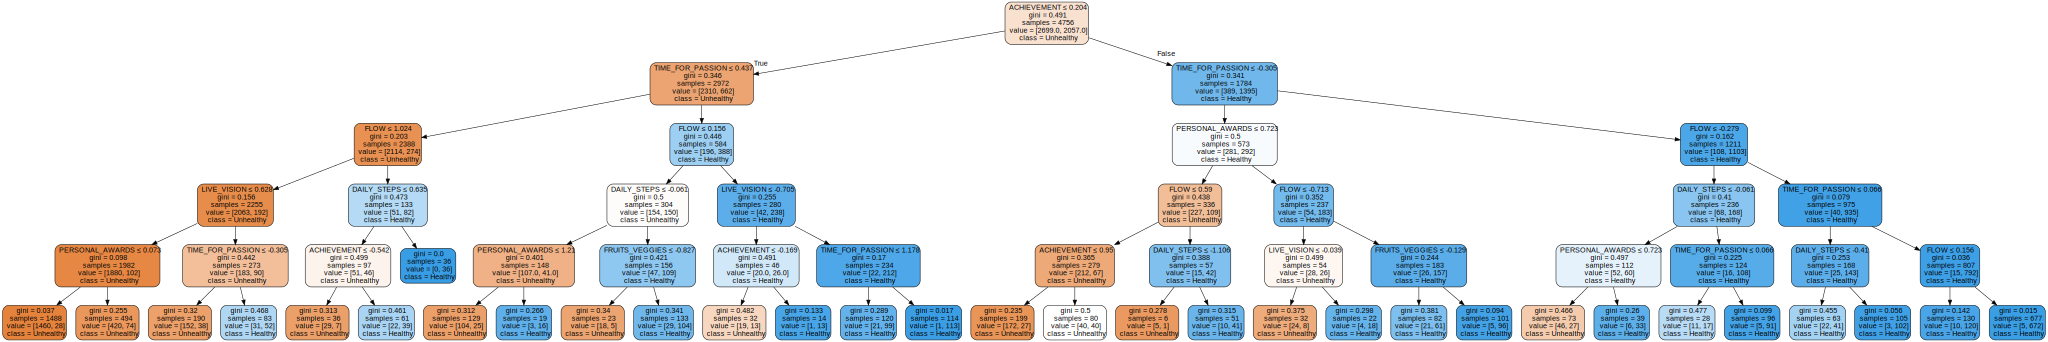

In [ ]:
import graphviz
from sklearn import tree

# --- VẼ CÂY QUYẾT ĐỊNH ---

dot_data = tree.export_graphviz(
    tree_model,                              # model DecisionTreeClassifier đã train
    out_file=None,
    feature_names=features_selected,   # list các feature đã dùng để train
    class_names=["Unhealthy", "Healthy"],  # Tên 2 lớp (0 – 1)
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

depths = [1, 3, 5, 10, 12,13,14, 15, 20, 25, 30]

print("===== DECISION TREE - SO SÁNH ĐỘ SÂU =====\n")

for d in depths:
    tree_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree_model.fit(X_train_s, y_train)

    # Predict trên validation
    y_val_pred = tree_model.predict(X_val_s)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"Depth = {d}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print("-" * 40)


===== DECISION TREE - SO SÁNH ĐỘ SÂU =====

Depth = 1
  Accuracy : 0.7823
  Precision: 0.7972
  Recall   : 0.6657
  F1-score : 0.7255
----------------------------------------
Depth = 3
  Accuracy : 0.8353
  Precision: 0.8408
  Recall   : 0.7635
  F1-score : 0.8003
----------------------------------------
Depth = 5
  Accuracy : 0.8574
  Precision: 0.8451
  Recall   : 0.8204
  F1-score : 0.8326
----------------------------------------
Depth = 10
  Accuracy : 0.8927
  Precision: 0.8861
  Recall   : 0.8628
  F1-score : 0.8743
----------------------------------------
Depth = 12
  Accuracy : 0.8991
  Precision: 0.8924
  Recall   : 0.8715
  F1-score : 0.8818
----------------------------------------
Depth = 13
  Accuracy : 0.8997
  Precision: 0.8973
  Recall   : 0.8672
  F1-score : 0.8820
----------------------------------------
Depth = 14
  Accuracy : 0.8940
  Precision: 0.8876
  Recall   : 0.8642
  F1-score : 0.8757
----------------------------------------
Depth = 15
  Accuracy : 0.8940
  Pr

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_values = [3, 5, 7, 9,10, 11]

print("===== KNN - SO SÁNH SỐ LÁNG GIỀNG k =====\n")

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_s, y_train)

    # Predict trên validation
    y_val_pred = knn_model.predict(X_val_s)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"k = {k}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print("-" * 40)


===== KNN - SO SÁNH SỐ LÁNG GIỀNG k =====

k = 3
  Accuracy : 0.9262
  Precision: 0.9303
  Recall   : 0.8964
  F1-score : 0.9130
----------------------------------------
k = 5
  Accuracy : 0.9388
  Precision: 0.9455
  Recall   : 0.9109
  F1-score : 0.9279
----------------------------------------
k = 7
  Accuracy : 0.9489
  Precision: 0.9576
  Recall   : 0.9226
  F1-score : 0.9398
----------------------------------------
k = 9
  Accuracy : 0.9508
  Precision: 0.9592
  Recall   : 0.9255
  F1-score : 0.9421
----------------------------------------
k = 10
  Accuracy : 0.9457
  Precision: 0.9658
  Recall   : 0.9066
  F1-score : 0.9352
----------------------------------------
k = 11
  Accuracy : 0.9489
  Precision: 0.9548
  Recall   : 0.9255
  F1-score : 0.9400
----------------------------------------
